# Survival Multiarmed Bandits

## Comparing Multiple Algorithms using Repetitions

In [3]:
#pipy packages
#!pip install -q SMPyBandits

#link to google drive for importing .py files
#from google.colab import drive
#drive.mount('/content/drive')
#localpath = '/content/drive/My Drive/Colab Notebooks/MultiArmedBandits/MyMAB/'

import os
localpath = os.getcwd() + '\\'

#local packages
from importlib.machinery import SourceFileLoader
mabarms = SourceFileLoader('mabarms', localpath + 'mabarms.py').load_module()
mabalgs = SourceFileLoader('mabalgs', localpath + 'mabalgs.py').load_module()
mabsim = SourceFileLoader('mabsim', localpath +  'mabsim.py').load_module()
mabplot = SourceFileLoader('mabplot', localpath + 'mabplot.py').load_module()

If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments
Info: Using the Jupyter notebook version of the tqdm() decorator, tqdm_notebook() ...
ERROR: 'resource' module not available, but it is in the standard library.
Have you messed up your Python installation?
Are you on Windows? In this case, it's okay.
Please submit a new bug on https://github.com/SMPyBandits/SMPyBandits/issues/new
If you want the speed up brought by numba.jit, try to manually install numba and check that it works (installing llvmlite can be tricky, cf. https://github.com/numba/numba#custom-python-environments


In [4]:
#Dependencies

import numpy as np
import pandas as pd

from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline
#%matplotlib notebook
#import pickle

#Arms
from SMPyBandits.Arms import Bernoulli, Gaussian, Constant
from mabarms import ExtendedBernoulli

#Policies
from SMPyBandits.Policies import Uniform, EmpiricalMeans, UCBalpha, UCBV, klUCB, Thompson, SoftMix, BayesUCB
from mabalgs import SafeEpsilonGreedy, SafeUCB, SafeUCBalpha, ClassicEpsilonGreedy, ClassicEpsilonDecreasing, ClassicOptimisticGreedy, SafeKLUCB, PositiveGamblerUCB, GamblerBayesUCB, MaRaB

#Sim
from mabsim import mabs
from mabplot import mabplt

## Setting (10-Bernoulli-Arms)

In [5]:
plt.rcParams['figure.figsize'] = (16, 8)

# BERNOULLI ARMS :

#means = np.array([0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55])
#means = np.array([0.3, 0.4, 0.4, 0.4, 0.4, 0.4, 0.45, 0.55, 0.6])
#means = np.concatenate((np.repeat(0.1, 15), np.repeat(0.7, 5), [0.9]))
#means = np.concatenate((np.repeat(0.1, 30), np.repeat(0.6, 5), [0.8]))

maxr = +1.0
minr = -1.0
ampl = maxr - minr

#A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]

k = 10

#BERNOULLI
means = np.linspace(0.0, 0.6, k)
A = [ExtendedBernoulli(m, maxr=maxr, minr=minr) for m in means]

In [6]:
#initial budget
b_0 = 20.0
b_s = 3.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCBalpha(k, alpha=1.0*ampl, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     PositiveGamblerUCB(k, lower=minr, amplitude=ampl),
     #SoftMix(k, lower=minr, amplitude=ampl), ##implementation to be verified...
     EmpiricalMeans(k, lower=minr, amplitude=ampl),
     MaRaB(k, lower=minr, amplitude=ampl)
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     #UCBV(k, lower=minr, amplitude=ampl)
     #Thompson(k)
    ]

crits = [
    "Survival Episodes Rate", 
    "Survival Time (before ruin or end) (averaged over episodes)", 
    "Survival Time (std dev)", 
    "Cumulative Time on Negative Budget (averaged over episodes)", 
    "Cumulative Time on Negative Budget (std dev)", 
    "Cumulative Negative Budget (averaged over episodes)",
    "Cumulative Negative Budget (std dev)",
    "Cumulative Regret (averaged over episodes)",
    "Cumulative Regret (std dev)"
    ]
labels = ["$\epsilon$-greedy-ST", "$\epsilon$-greedy", "KL-UCB-ST", "KL-UCB", "UCB-ST", "UCB", "PG-UCB", "Greedy", "MaRaB"]
#colors=['r', 'g', 'b', 'c', 'm', 'y', 'tan', 'pink', 'teal', 'purple', 'sienna']
colors=['r', 'r', 'g', 'g', 'b', 'b', 'm', 'r', 'c']
styles=['--', '-', '--', '-', '--', '-', '-', ':', '-.']


#window average parameter (for graphics)
win = None #tau//10

## Simulation Bernoulli : short-horizon

 - Several Repetitions 
 - Short Horizon

In [7]:
#time-horizon
tau = 200

#repetitions
n = 100

M1 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M1.run(tqdm_leave=True)

repetitions:   0%|          | 0/100 [00:00<?, ?it/s]

$\epsilon$-greedy-ST  \
Survival Episodes Rate                                          0.000000   
Survival Time (before ruin or end) (averaged ov...             16.500000   
Survival Time (std dev)                                         9.747307   
Cumulative Time on Negative Budget (averaged ov...            182.090000   
Cumulative Time on Negative Budget (std dev)                   12.076502   
Cumulative Negative Budget (averaged over episo...         -18038.320000   
Cumulative Negative Budget (std dev)                         7822.683545   
Cumulative Regret (averaged over episodes)                    242.320000   
Cumulative Regret (std dev)                                    73.704665   

                                                    $\epsilon$-greedy  \
Survival Episodes Rate                                       0.000000   
Survival Time (before ruin or end) (averaged ov...          16.130000   
Survival Time (std dev)                                     10.186908   
Cumulative Time on Negative Budget (averaged ov...         182.730000   
Cumulative Time on Negative Budget (std dev)                11.149758   
Cumulative Negative Budget (averaged over episo...      -19354.540000   
Cumulative Negative Budget (std dev)                      7876.104568   
Cumulative Regret (averaged over episodes)                 253.760000   
Cumulative Regret (std dev)                                 73.273886   

                                                       KL-UCB-ST  \
Survival Episodes Rate                                  0.000000   
Survival Time (before ruin or end) (averaged ov...     12.370000   
Survival Time (std dev)                                 4.838709   
Cumulative Time on Negative Budget (averaged ov...    186.250000   
Cumulative Time on Negative Budget (std dev)            5.904871   
Cumulative Negative Budget (averaged over episo... -17434.010000   
Cumulative Negative Budget (std dev)                 5481.756823   
Cumulative Regret (averaged over episodes)            231.640000   
Cumulative Regret (std dev)                            53.180733   

                                                          KL-UCB  \
Survival Episodes Rate                                  0.000000   
Survival Time (before ruin or end) (averaged ov...     13.110000   
Survival Time (std dev)                                 6.118652   
Cumulative Time on Negative Budget (averaged ov...    186.100000   
Cumulative Time on Negative Budget (std dev)            6.740178   
Cumulative Negative Budget (averaged over episo... -20408.620000   
Cumulative Negative Budget (std dev)                 3636.903993   
Cumulative Regret (averaged over episodes)            260.880000   
Cumulative Regret (std dev)                            33.664605   

                                                          UCB-ST  \
Survival Episodes Rate                                  0.000000   
Survival Time (before ruin or end) (averaged ov...     11.860000   
Survival Time (std dev)                                 4.379543   
Cumulative Time on Negative Budget (averaged ov...    187.030000   
Cumulative Time on Negative Budget (std dev)            5.036775   
Cumulative Negative Budget (averaged over episo... -17715.480000   
Cumulative Negative Budget (std dev)                 7285.205659   
Cumulative Regret (averaged over episodes)            233.800000   
Cumulative Regret (std dev)                            69.786818   

                                                             UCB  \
Survival Episodes Rate                                  0.000000   
Survival Time (before ruin or end) (averaged ov...     11.900000   
Survival Time (std dev)                                 4.290688   
Cumulative Time on Negative Budget (averaged ov...    187.690000   
Cumulative Time on Negative Budget (std dev)            4.309745   
Cumulative Negative Budget (averaged over episo... -24469.530000   
Cumulative Negative Budget (std dev)     

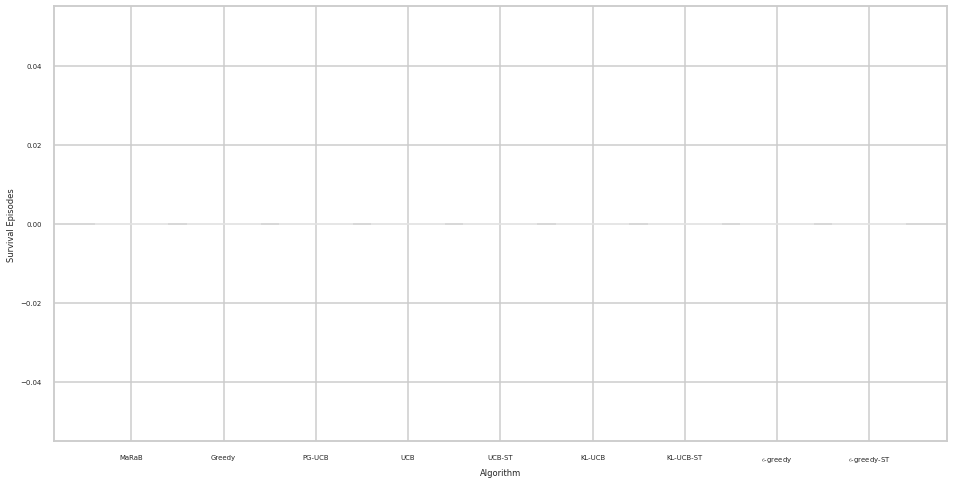

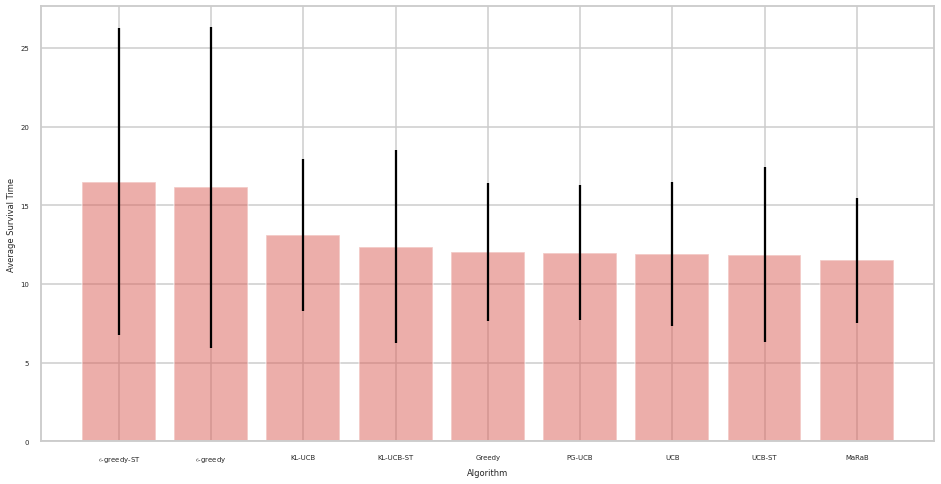

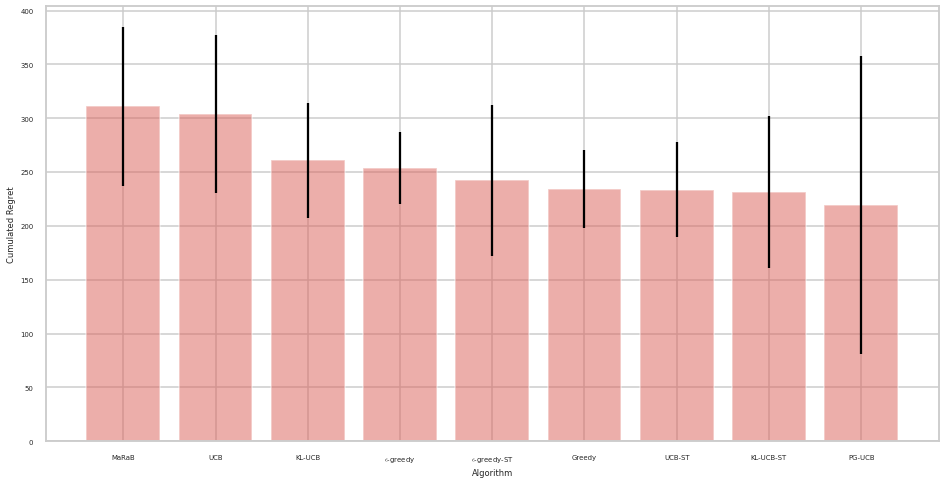

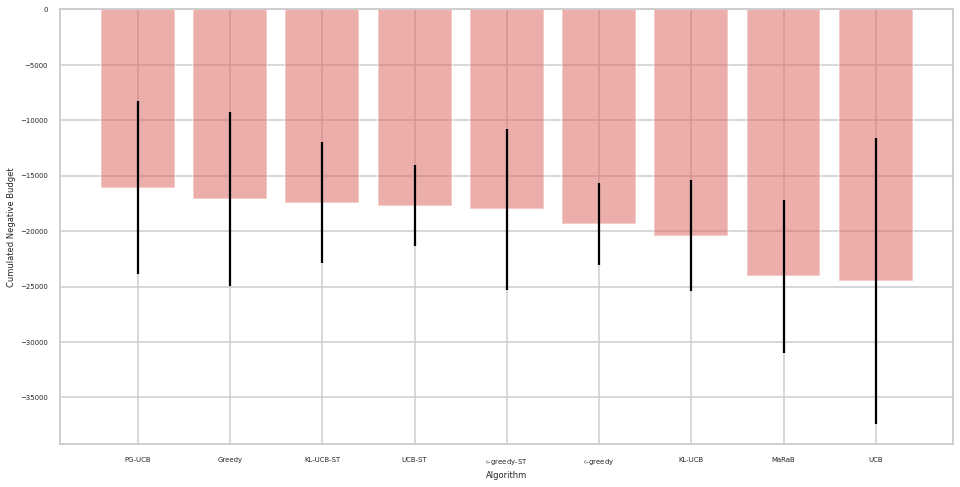

AttributeError: 'mabs' object has no attribute 'SC'

In [8]:
P1 = mabplt(M1)

values = [M1.renb, M1.MTTNB, M1.DTTNB, M1.mstnb, M1.dstnb, M1.msnb, M1.dsnb, M1.msl, M1.dsl]

df = pd.DataFrame(values, crits, columns=labels)
display(df)

P1.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', ylabel="Survival Episodes", compact_view=False, title="") #, filename='images/surv_rate_B_t200.pdf')
P1.plot_comp_algs_survival_time(names=labels, names_rotation='horizontal', compact_view=False, title="") # filename='images/surv_time_B_t200.pdf')
P1.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False, title="") #, filename='images/regret_B_t200.pdf')
P1.plot_comp_algs_cumulated_negative_budget(names=labels, names_rotation='horizontal', compact_view=False, title="")


P1.plot_survival_progression(show=False, title="", ylabel="Survival Rate", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/survival_progression_B_t200.pdf')
plt.show()

P1.plot_budget_progression(show=False, title="", ylabel="Budget (average)", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/budget_progression_B_t200.pdf')
plt.show()

P1.plot_precision_progression(show=False, title="", ylabel="Precision (average)", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/precision_progression_B_t200.pdf')
plt.show()

P1.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_cumulated_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P1.plot_cumulated_regret_progression(show=False, title="", ylabel="Cumulated Regret (average)", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/regret_progression_B_t200.pdf')
plt.show()

#for j, g in enumerate(M1.G):
#    P1.plot_survival_histogram(j=j, title=str(g))

## Simulation Bernoulli : long-horizon

 - Few Repetitions 
 - Long Horizon

In [0]:
#time-horizon
tau = 10000 #15000 

#repetitions
n = 1 #100

M2 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M2.run(tqdm_leave=True)

$\epsilon$-greedy-ST  ...       MaRaB
Survival Episodes Rate                                               1.0  ...         0.0
Survival Time (before ruin or end) (averaged ov...               10000.0  ...       142.0
Survival Time (std dev)                                              0.0  ...         0.0
Cumulative Time on Negative Budget (averaged ov...                   0.0  ...      9858.0
Cumulative Time on Negative Budget (std dev)                         0.0  ...         0.0
Cumulative Negative Budget (averaged over episo...                   0.0  ... -10224217.0
Cumulative Negative Budget (std dev)                                 0.0  ...         0.0
Cumulative Regret (averaged over episodes)                         944.0  ...      4066.0
Cumulative Regret (std dev)                                          0.0  ...         0.0

[9 rows x 9 columns]

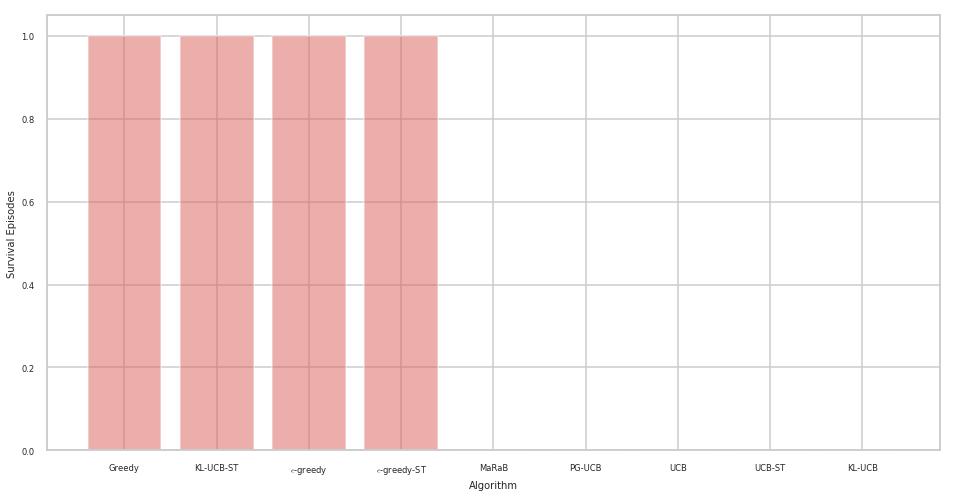

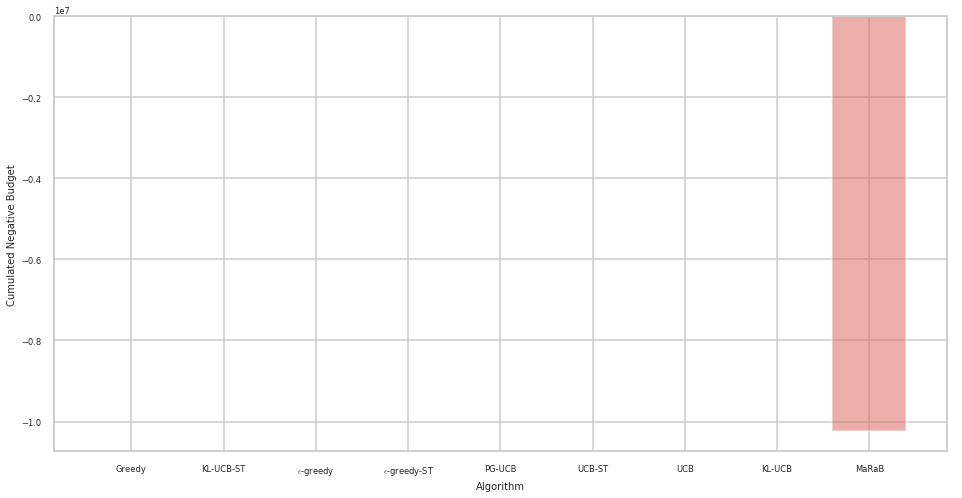

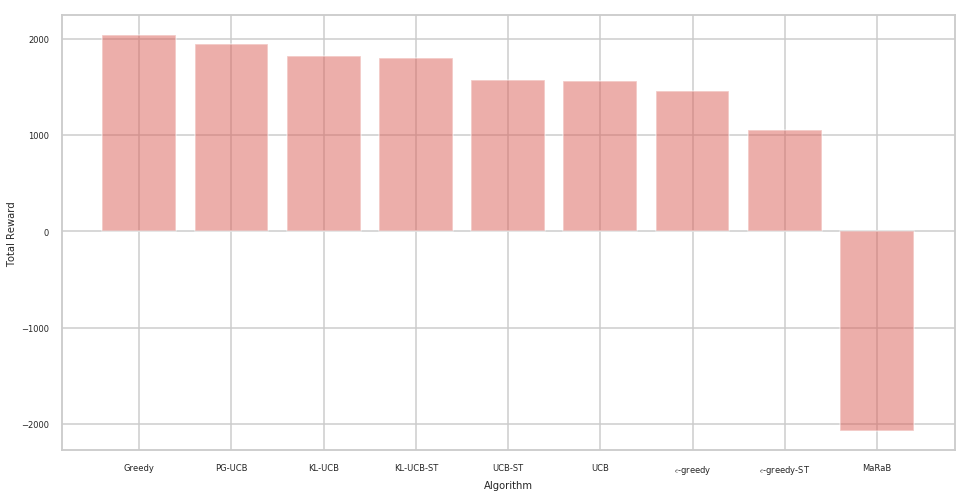

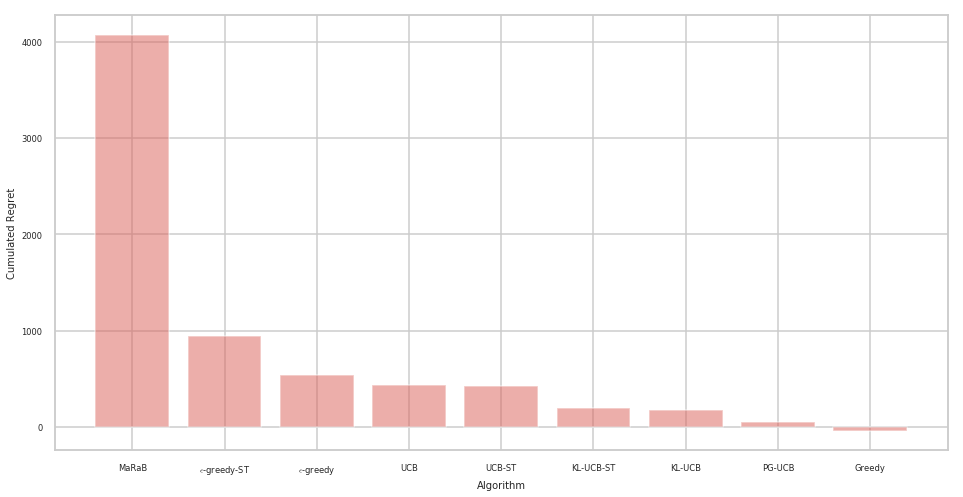

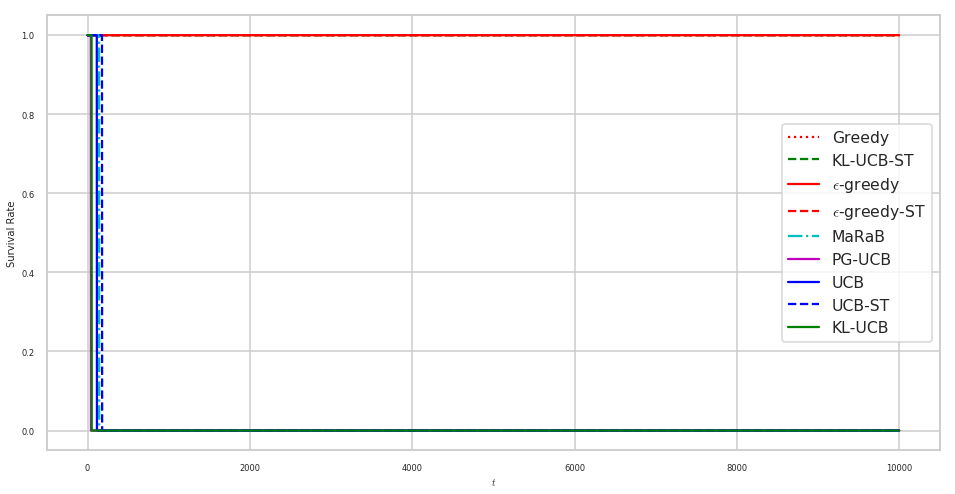

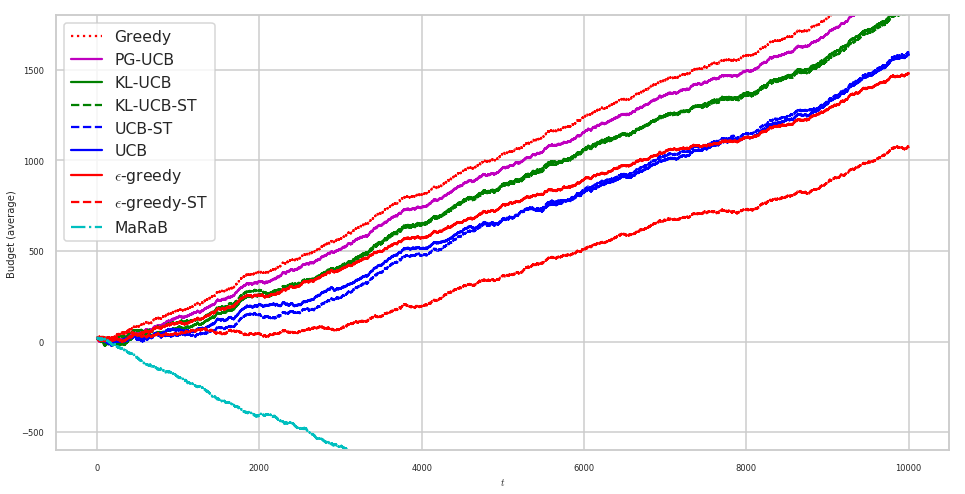

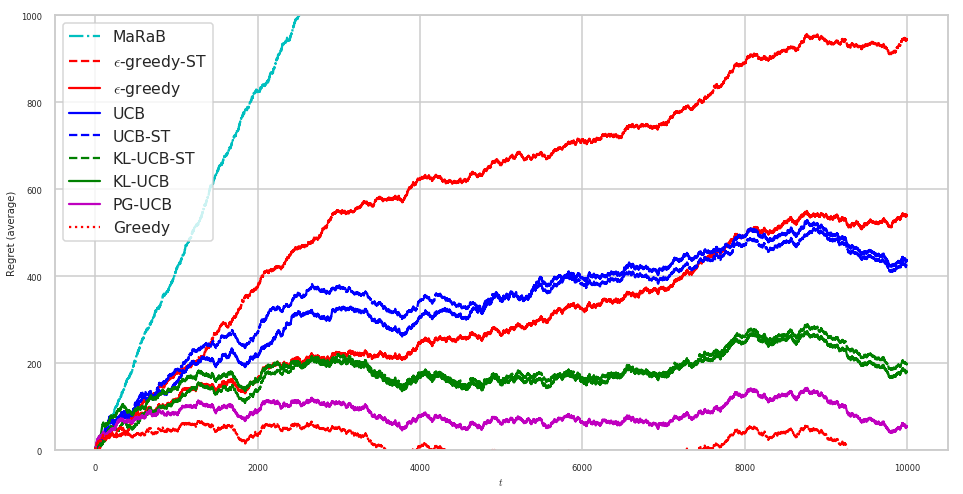

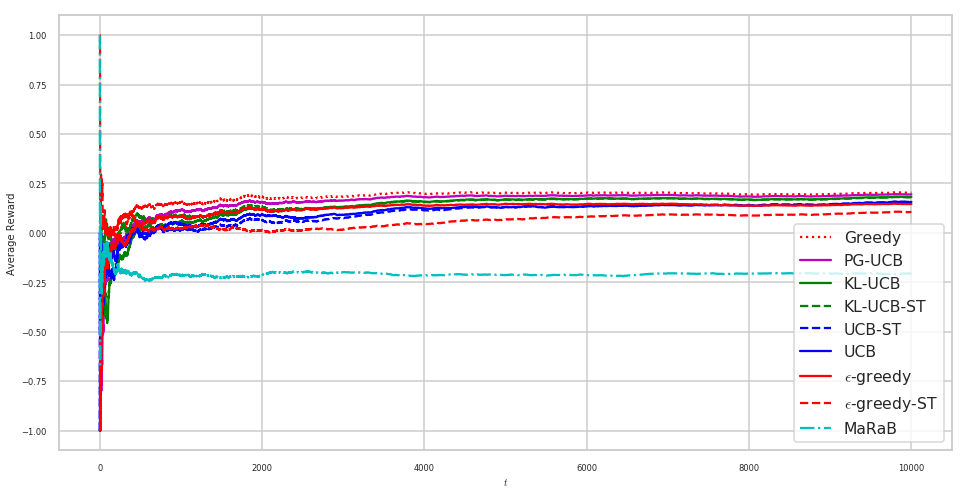

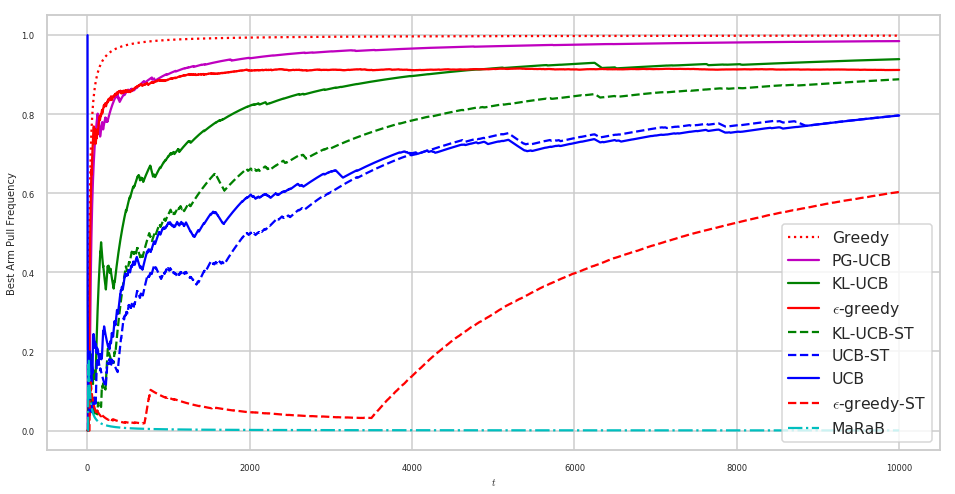

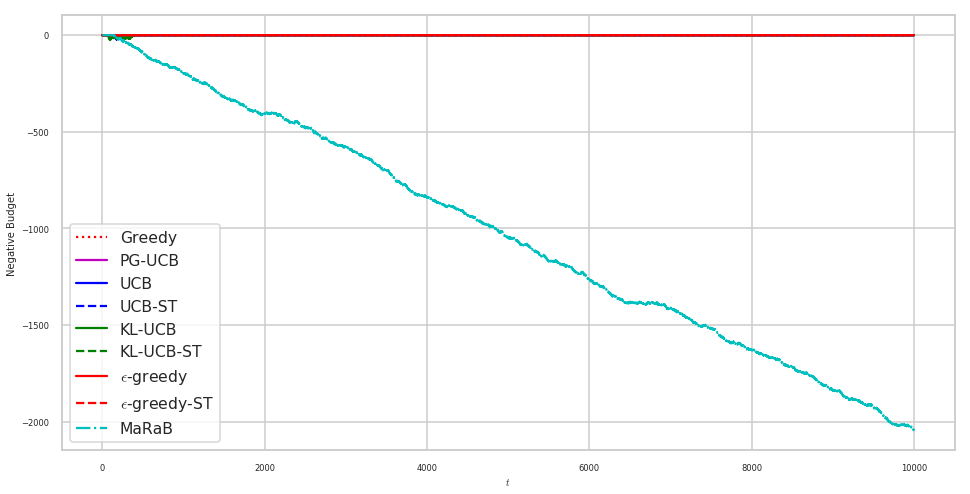

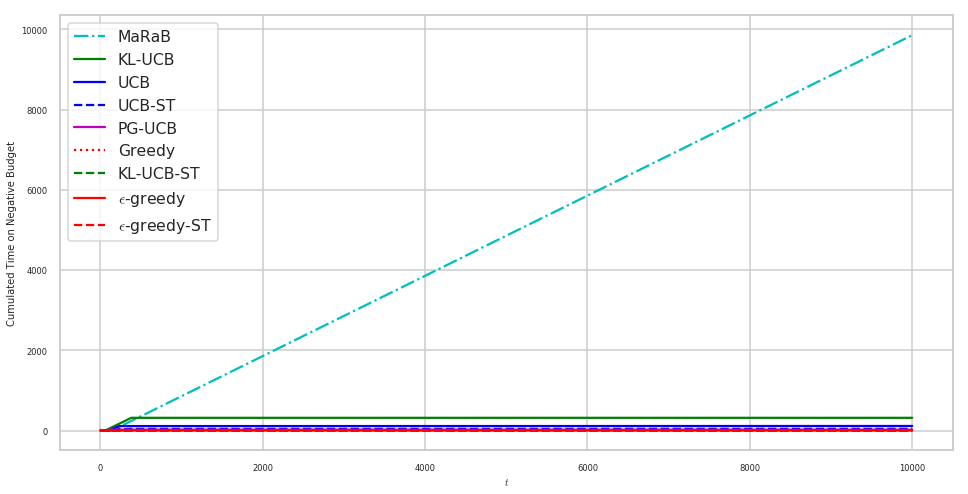

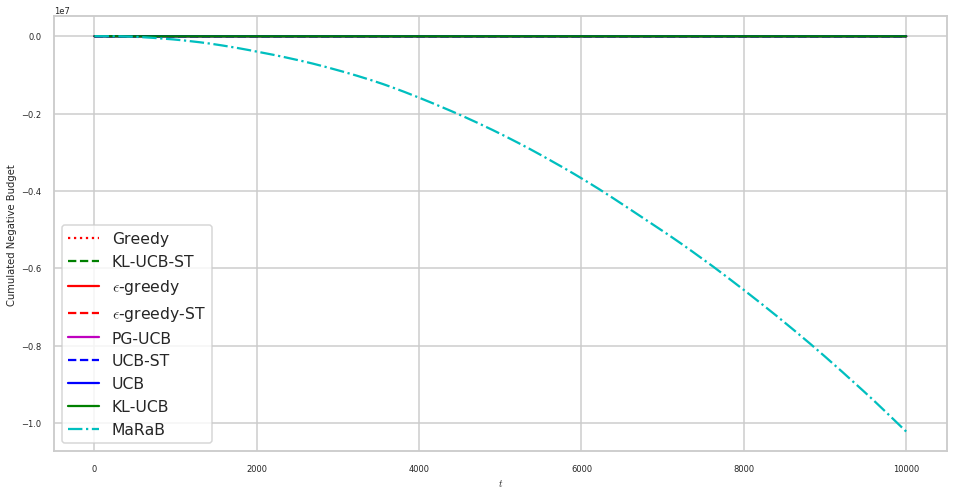

In [12]:
P2 = mabplt(M2)

values = [M2.renb, M2.MTTNB, M2.DTTNB, M2.mstnb, M2.dstnb, M2.msnb, M2.dsnb, M2.msl, M2.dsl]

df = pd.DataFrame(values, crits, labels)
display(df)

P2.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_cumulated_negative_budget(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_total_rewards(names=labels, names_rotation='horizontal', compact_view=False, title="")
P2.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False, title="")

P2.plot_survival_progression(show=False, title="", ylabel="Survival Rate", names=labels, linestyles=styles, linecolors=colors)
#plt.savefig('images/survival_progression_B_t10000.pdf')
plt.show()

P2.plot_budget_progression(show=False, title="", ylabel="Budget (average)", names=labels, linestyles=styles, linecolors=colors)
plt.ylim(-600, 1800)
#plt.savefig('images/budget_progression_B_t10000.pdf')
plt.show()

P2.plot_cumulated_regret_progression(show=False, title="", ylabel="Regret (average)", names=labels, linestyles=styles, linecolors=colors)
plt.ylim(0, 1000)
#plt.savefig('images/regret_progression_B_t10000.pdf')
plt.show()

P2.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P2.plot_precision_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P2.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)
P2.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)
P2.plot_cumulated_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

## Setting: 10-Gaussian-Arms - Linear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


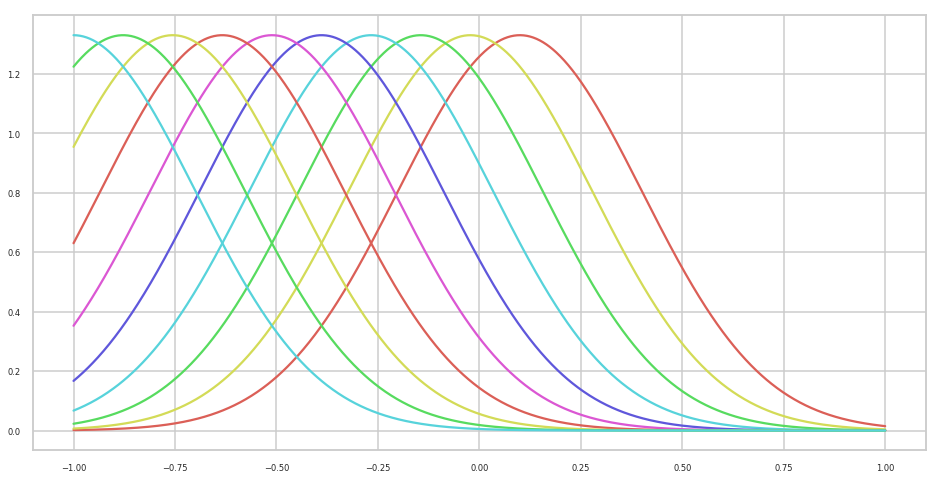

In [13]:
plt.rcParams['figure.figsize'] = (16, 8)

maxr = +1.0
minr = -1.0
ampl = maxr - minr

# NORMALLY RANDOM GAUSSIAN ARMS :

# draw random means for gaussian arms based on a given generative distribution
#generative_mean = 0.0
#generative_variance = 2.0
#means = np.random.normal(generative_mean, generative_variance, k)

#number of arms
#k = len(means)

# ONE POSITIVE ALL NEGATIVE GAUSSIAN ARMS :

#k = 30
#means = np.repeat(-0.1, k)
#means[k-1] = 0.1
#sigma = 0.5


# LINEARLY INCREASING GAUSSIAN ARMS :

# linear means for each arm
k = 10

means = np.linspace(-1.0, 0.1, k)
#means = np.linspace(-0.5, 0.5, k)

#variance for each arm
sigma = np.repeat(0.3, k)
#sigma = np.tile([0.4, 0.8], k)
#sigma = np.abs(means)*2
#sigma = np.concatenate( (np.linspace(0.5, 0.1, k // 2), np.linspace(0.1, 0.5, k // 2)) )

#arms objects (normal distribution, non-truncated)
#A = [Gaussian(mu, sigma=sigma, mini=float('-inf'), maxi=float('inf')) for mu in means]

#****
#arms objects (normal distribution, truncated)
A = [Gaussian(mu, sigma=sig, mini=minr, maxi=maxr) for mu, sig in zip(means, sigma)]
#****


#show distributions
x = np.linspace(minr, maxr, 1000)
idx = np.argsort(means)[::-1] #order
#for i, mu in enumerate(means):
for i in idx:
    mu = means[i]
    sig = sigma[i]
    plt.plot(x, mlab.normpdf(x, mu, sig), label="$\mu_{" + str(i+1) + "}=" + str(mu) + "$")#
#plt.legend()
plt.show()

In [0]:
#initial budget
b_0 = 10.0
b_s = 3.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCBalpha(k, alpha=1.0*ampl, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     PositiveGamblerUCB(k, lower=minr, amplitude=ampl),
     #SoftMix(k, lower=minr, amplitude=ampl), ##implementation to be verified...
     EmpiricalMeans(k, lower=minr, amplitude=ampl),
     MaRaB(k, lower=minr, amplitude=ampl)
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     #UCBV(k, lower=minr, amplitude=ampl)
     #Thompson(k)
    ]

#window average parameter (for graphics)
win = None #tau//10

## Simulation 3 : Linear Gaussian Short Horizon

 - Several Repetitions 
 - Short Horizon

In [15]:
#time-horizon
tau = 200

#repetitions
n = 100

M3 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M3.run(tqdm_leave=True)

$\epsilon$-greedy-ST  ...       MaRaB
Survival Episodes Rate                                          0.260000  ...    0.690000
Survival Time (before ruin or end) (averaged ov...             85.780000  ...  159.800000
Survival Time (std dev)                                        76.466801  ...   63.469993
Cumulative Time on Negative Budget (averaged ov...            103.050000  ...   25.530000
Cumulative Time on Negative Budget (std dev)                   77.592831  ...   47.565209
Cumulative Negative Budget (averaged over episo...          -1458.975952  ... -130.650236
Cumulative Negative Budget (std dev)                         1761.771439  ...  345.601922
Cumulative Regret (averaged over episodes)                     37.650925  ...   18.192577
Cumulative Regret (std dev)                                    20.949563  ...   10.482119

[9 rows x 9 columns]

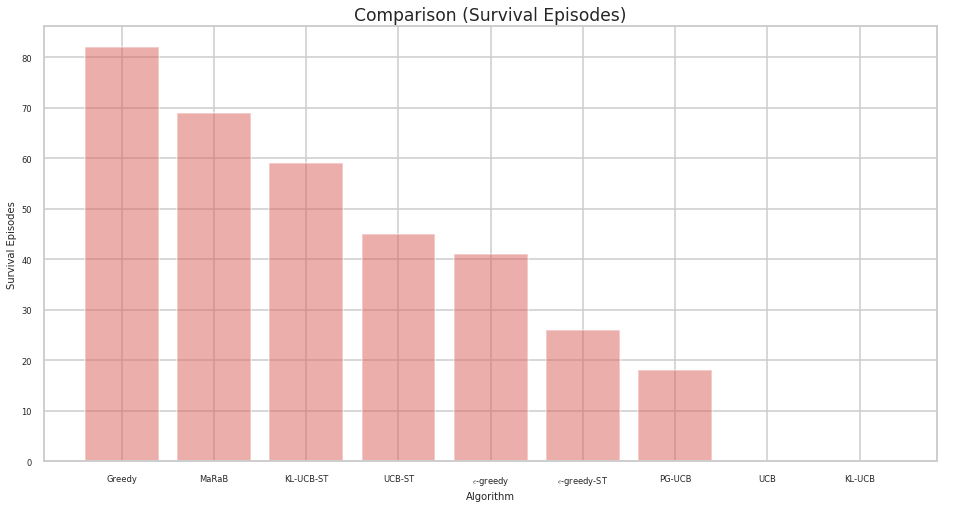

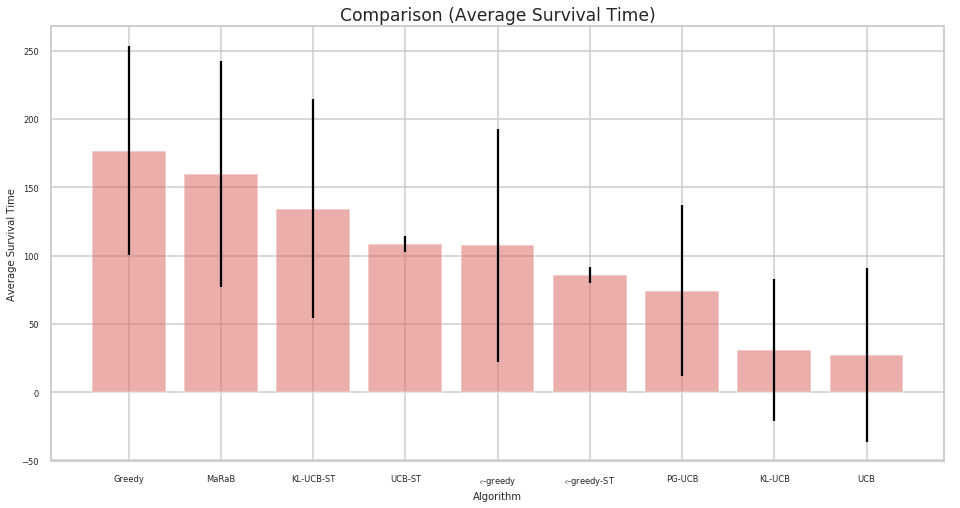

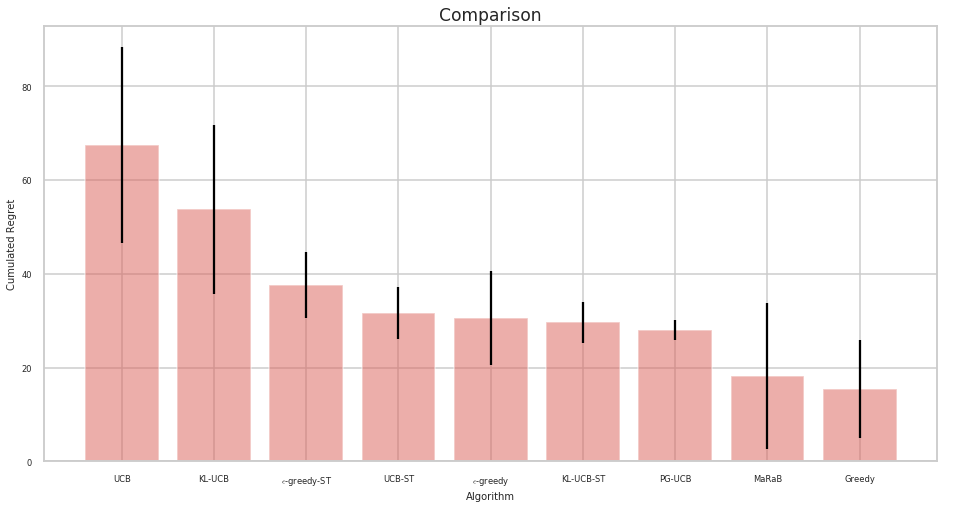

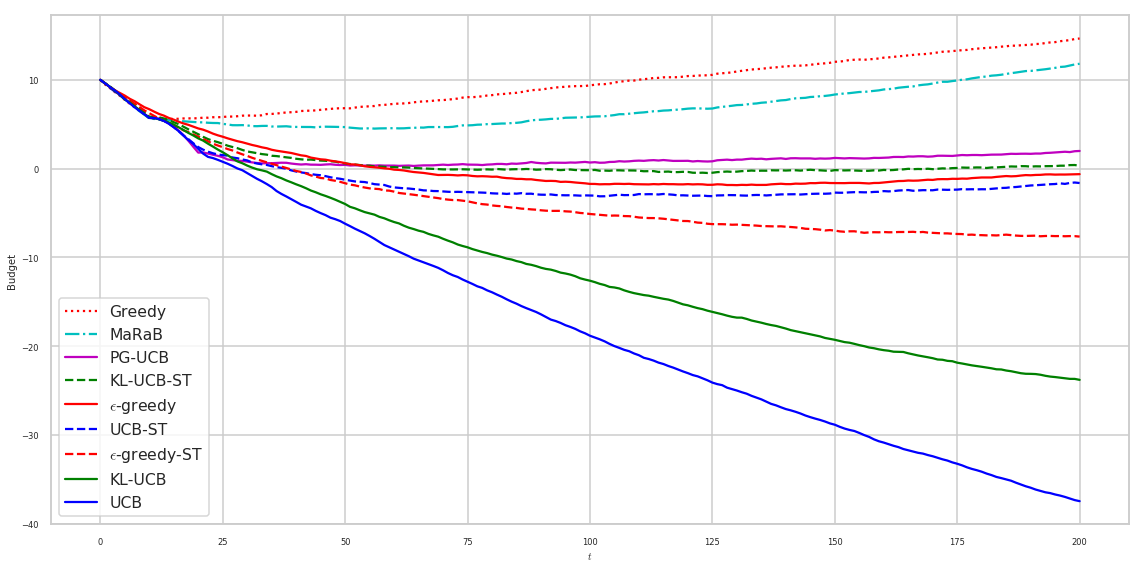

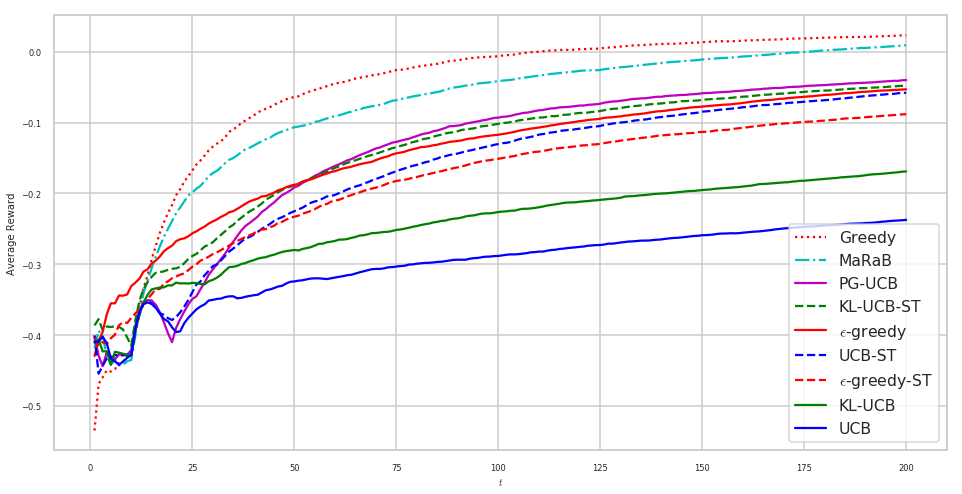

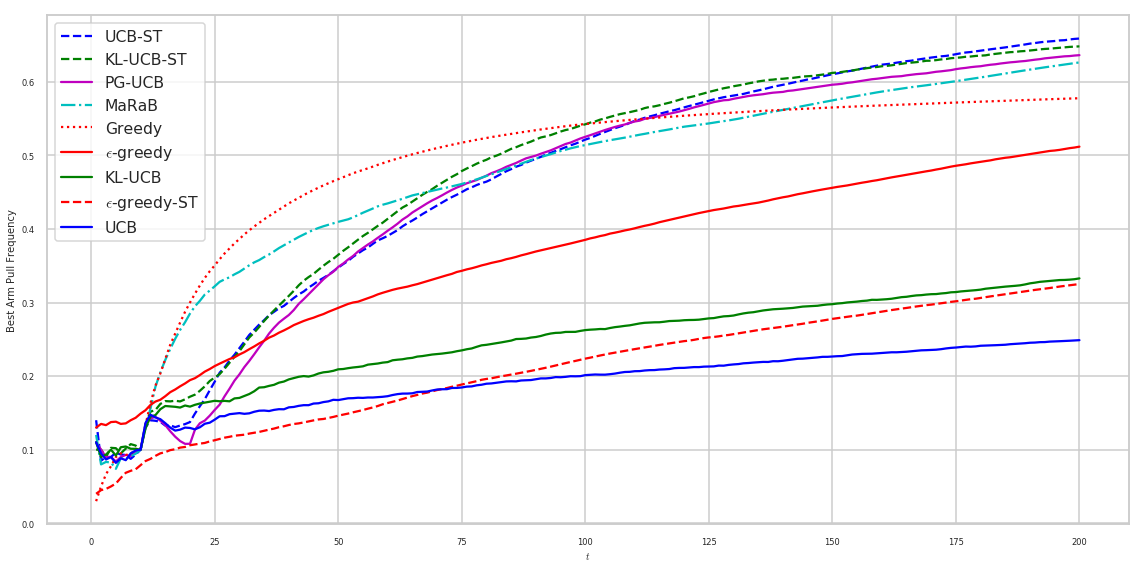

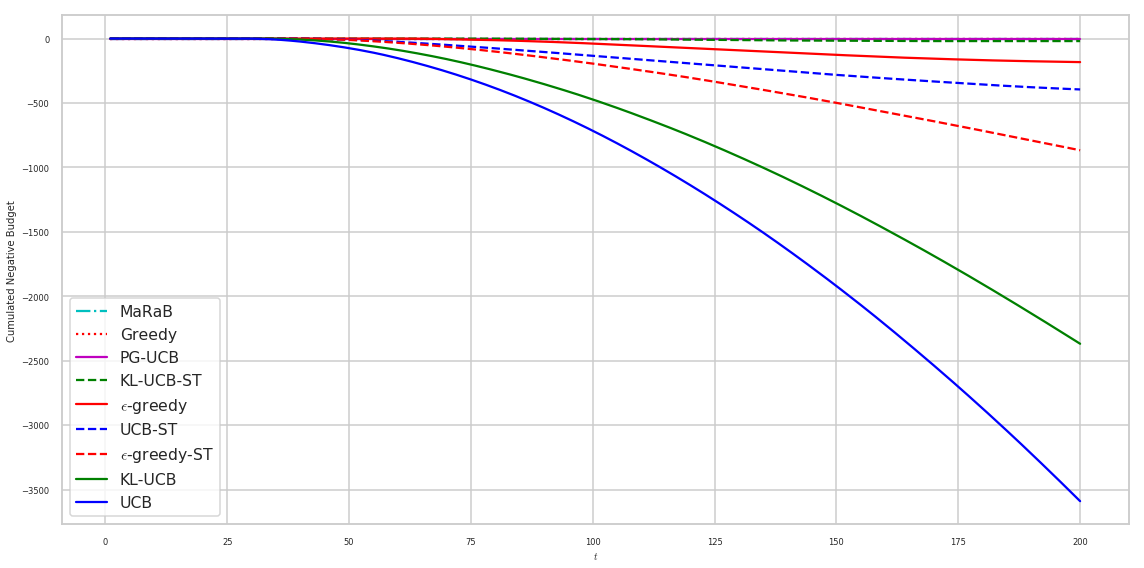

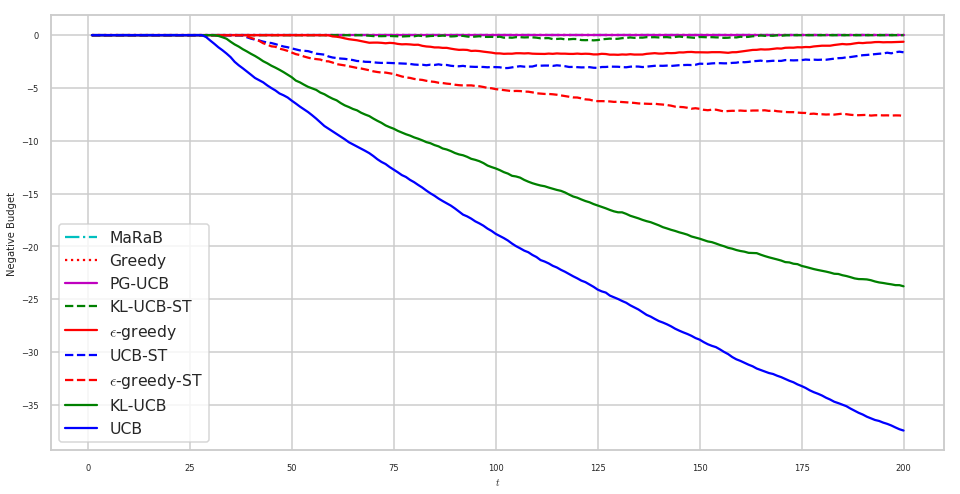

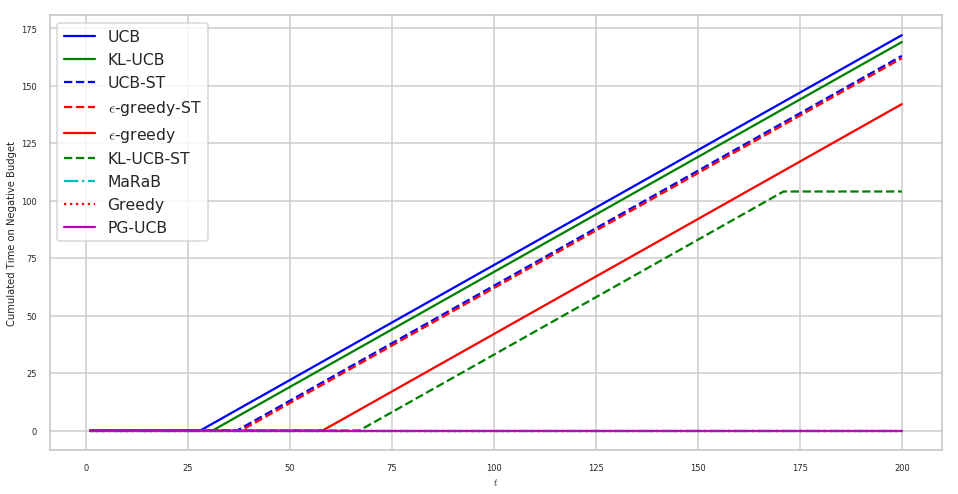

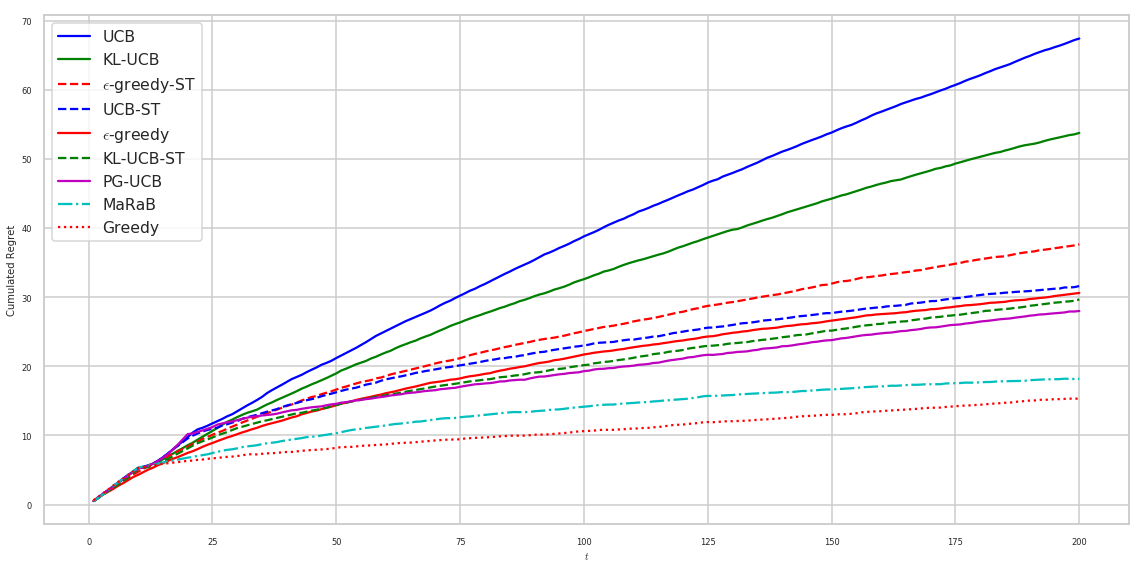

In [16]:
P3 = mabplt(M3)

values = [M3.renb, M3.MTTNB, M3.DTTNB, M3.mstnb, M3.dstnb, M3.msnb, M3.dsnb, M3.msl, M3.dsl]

df = pd.DataFrame(values, crits, columns=labels)
display(df)

P3.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False) #, filename='images/surv_rate_GL_t100.pdf')
P3.plot_comp_algs_survival_time(names=labels, names_rotation='horizontal', compact_view=False) #, filename='images/surv_time_GL_t100.pdf')
P3.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False)

P3.plot_budget_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
#plt.savefig('images/budget_GL_t200.pdf', bbox_inches='tight')
plt.show()

P3.plot_average_reward_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P3.plot_precision_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
#plt.savefig('images/precision_GL_t200.pdf', bbox_inches='tight')
plt.show()

P3.plot_cumulated_negative_budget_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
#plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

P3.plot_negative_budget_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P3.plot_negative_budget_time_progression(title="", names=labels, linestyles=styles, linecolors=colors)

P3.plot_cumulated_regret_progression(show=False, title="", names=labels, linestyles=styles, linecolors=colors)
plt.tight_layout()
#plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

#for j, g in enumerate(M.G):
#    P.plot_survival_histogram(j=j, title=str(g))

## Simulation 4 : Linear Gaussian - Long-Horizon

 - Few Repetitions 
 - Long Horizon

In [0]:
#time-horizon
tau = 15000 #15000 

#repetitions
n = 1 #100

M4 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M4.run(tqdm_leave=True)

$\epsilon$-greedy-ST  ...         MaRaB
Survival Episodes Rate                                          1.000000  ...      1.000000
Survival Time (before ruin or end) (averaged ov...          15000.000000  ...  15000.000000
Survival Time (std dev)                                         0.000000  ...      0.000000
Cumulative Time on Negative Budget (averaged ov...              0.000000  ...      0.000000
Cumulative Time on Negative Budget (std dev)                    0.000000  ...      0.000000
Cumulative Negative Budget (averaged over episo...              0.000000  ...      0.000000
Cumulative Negative Budget (std dev)                            0.000000  ...      0.000000
Cumulative Regret (averaged over episodes)                    822.450223  ...    -11.221964
Cumulative Regret (std dev)                                     0.000000  ...      0.000000

[9 rows x 9 columns]

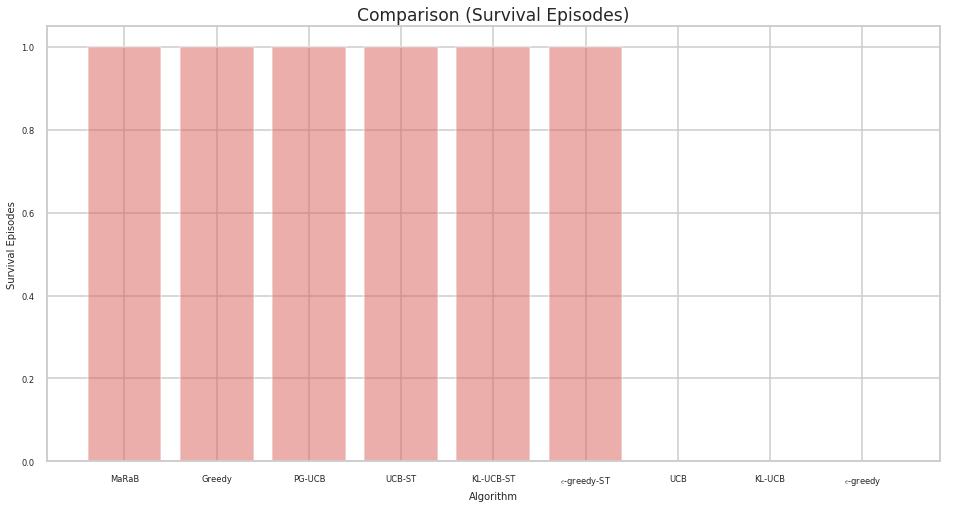

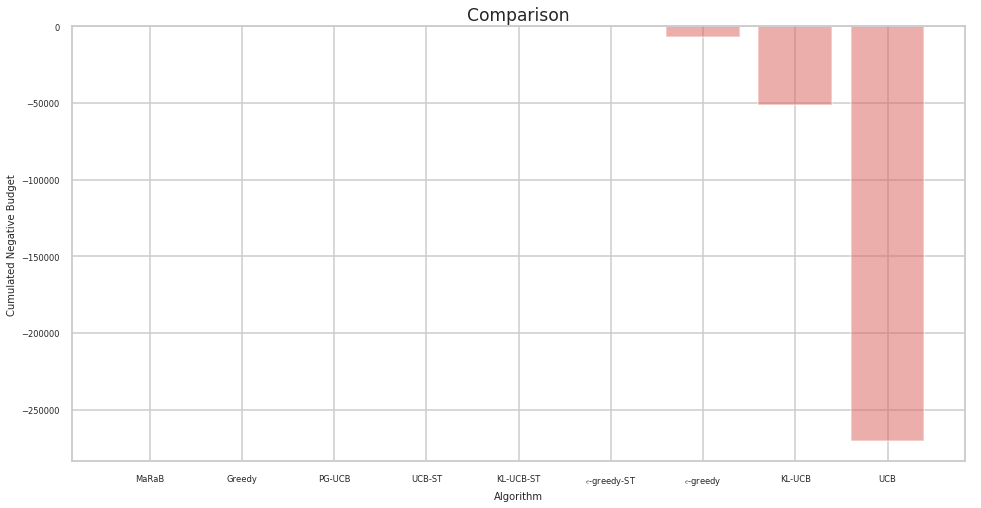

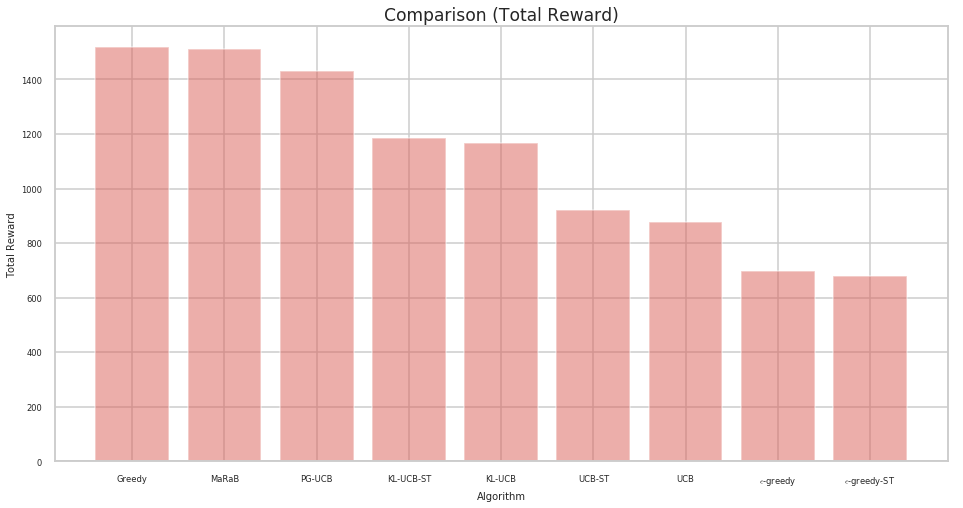

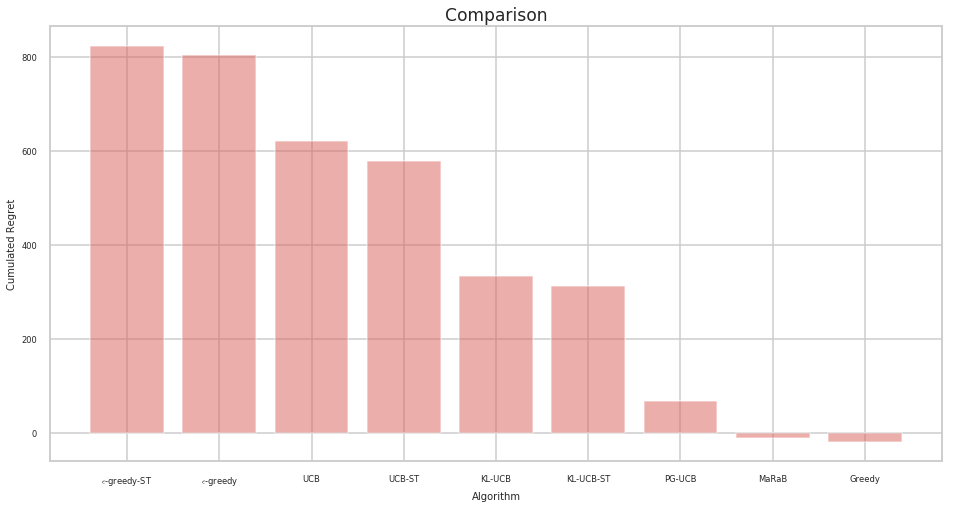

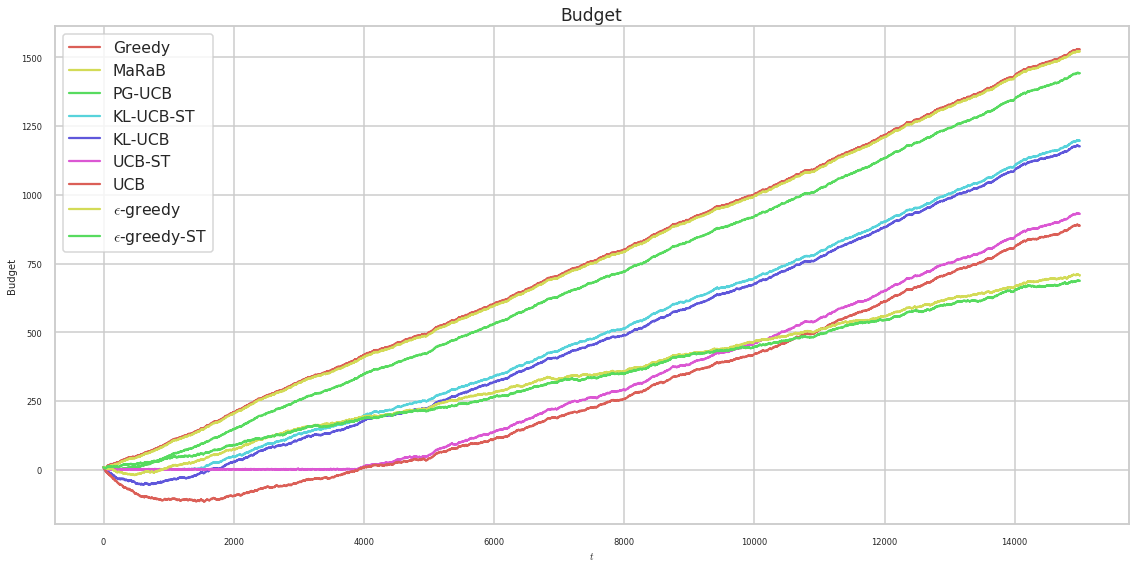

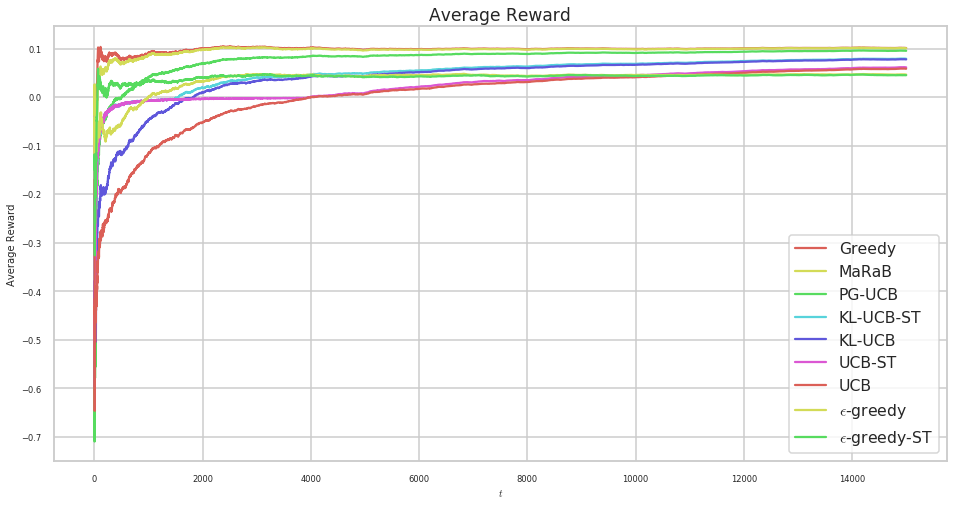

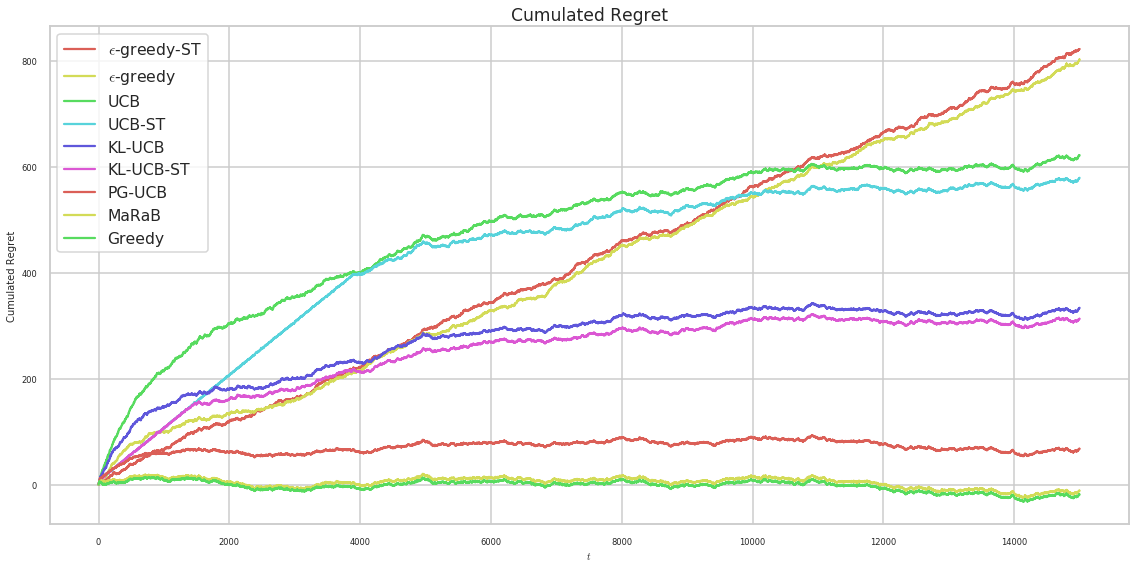

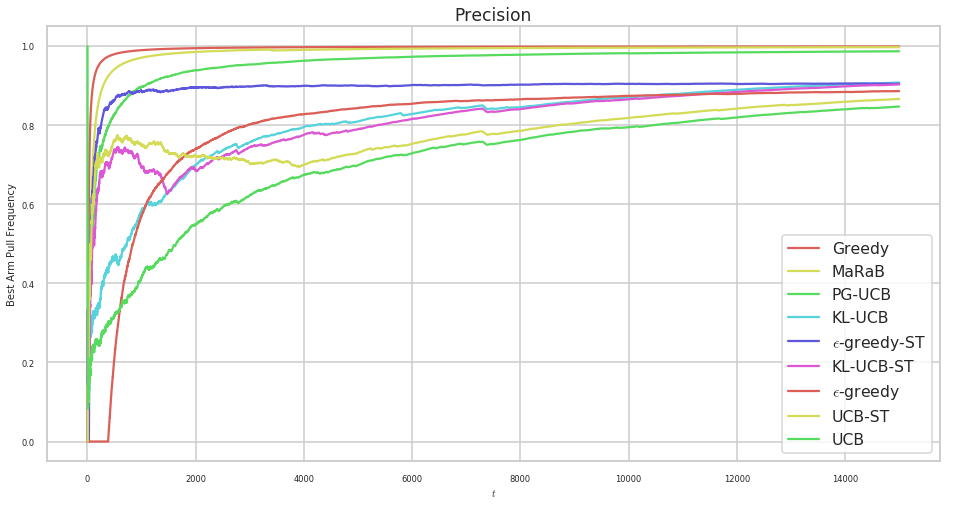

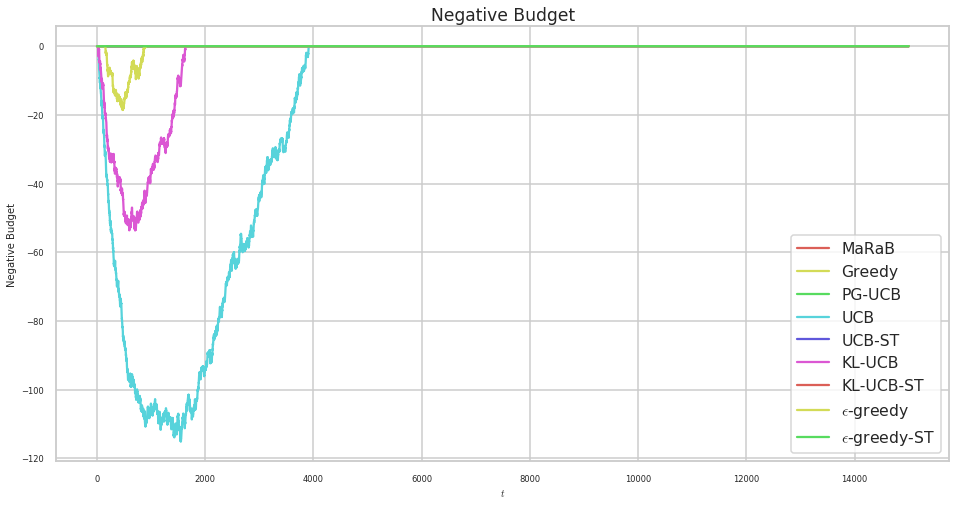

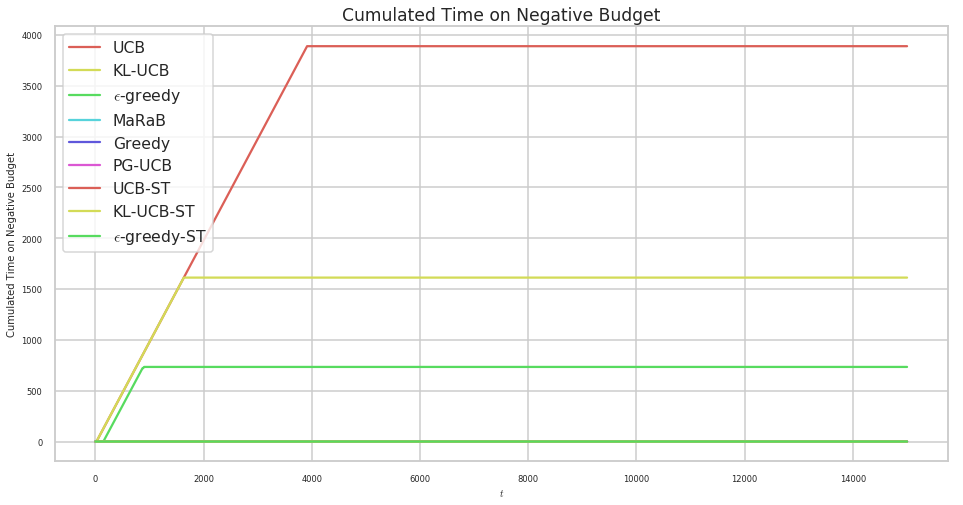

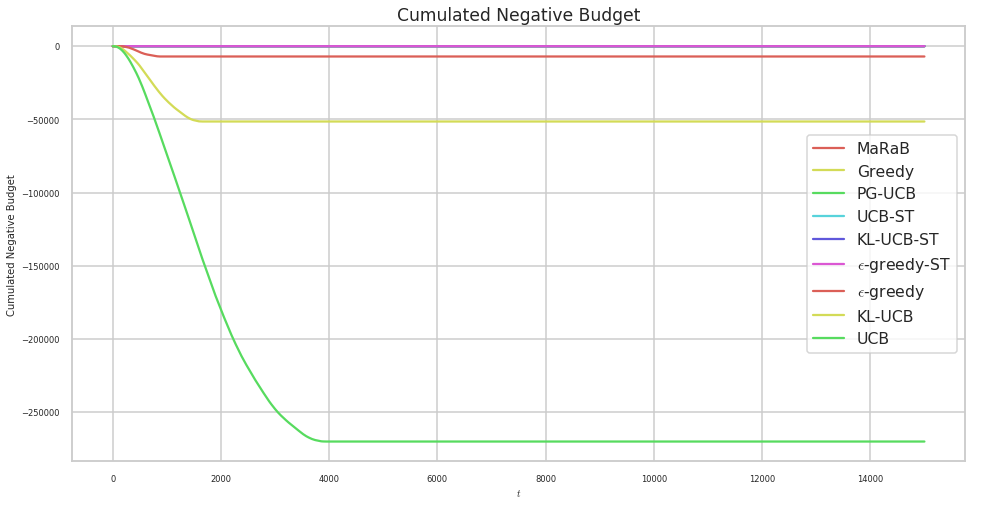

In [22]:
P4 = mabplt(M4)

values = [M4.renb, M4.MTTNB, M4.DTTNB, M4.mstnb, M4.dstnb, M4.msnb, M4.dsnb, M4.msl, M4.dsl]

linecolors = None

df = pd.DataFrame(values, crits, columns=labels)
display(df)

P4.plot_comp_algs_ruined_episodes(names=labels, names_rotation='horizontal', compact_view=False)
P4.plot_comp_algs_cumulated_negative_budget(names=labels, names_rotation='horizontal', compact_view=False)
P4.plot_comp_algs_total_rewards(names=labels, names_rotation='horizontal', compact_view=False)
P4.plot_comp_algs_cumulated_regret(names=labels, names_rotation='horizontal', compact_view=False)

P4.plot_budget_progression(show=False, names=labels, linecolors=linecolors)
plt.tight_layout()
#plt.savefig('images/budget_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P4.plot_average_reward_progression(names=labels, linecolors=linecolors)

P4.plot_cumulated_regret_progression(show=False, names=labels, linecolors=linecolors)
plt.tight_layout()
#plt.savefig('images/regret_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P4.plot_precision_progression(names=labels, linecolors=linecolors)

P4.plot_negative_budget_progression(names=labels, linecolors=linecolors)
P4.plot_negative_budget_time_progression(names=labels, linecolors=linecolors)
P4.plot_cumulated_negative_budget_progression(names=labels, linecolors=linecolors)

# Setting : 10-Gaussian-Arms Non-Linear

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


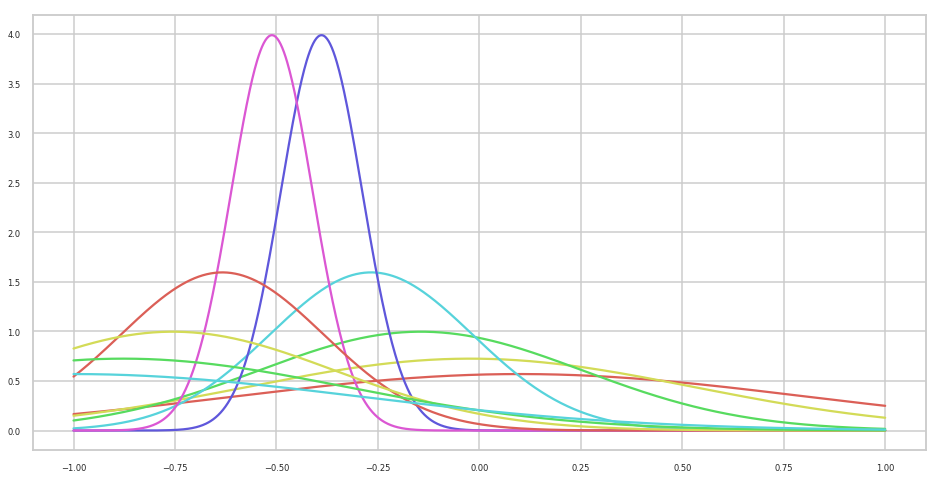

In [23]:
plt.rcParams['figure.figsize'] = (16, 8)

maxr = +1.0
minr = -1.0
ampl = maxr - minr

# NORMALLY RANDOM GAUSSIAN ARMS :

# draw random means for gaussian arms based on a given generative distribution
#generative_mean = 0.0
#generative_variance = 2.0
#means = np.random.normal(generative_mean, generative_variance, k)

#number of arms
#k = len(means)

# ONE POSITIVE ALL NEGATIVE GAUSSIAN ARMS :

#k = 30
#means = np.repeat(-0.1, k)
#means[k-1] = 0.1
#sigma = 0.5


# LINEARLY INCREASING GAUSSIAN ARMS :

# linear means for each arm
k = 10

means = np.linspace(-1.0, 0.1, k)
#means = np.linspace(-0.5, 0.5, k)

#variance for each arm
#sigma = np.repeat(0.3, k)
#sigma = np.tile([0.4, 0.8], k)
#sigma = np.abs(means)*2
sigma = np.concatenate( (np.linspace(0.7, 0.1, k // 2), np.linspace(0.1, 0.7, k // 2)) )

#arms objects (normal distribution, non-truncated)
#A = [Gaussian(mu, sigma=sigma, mini=float('-inf'), maxi=float('inf')) for mu in means]

#****
#arms objects (normal distribution, truncated)
A = [Gaussian(mu, sigma=sig, mini=minr, maxi=maxr) for mu, sig in zip(means, sigma)]
#****


#show distributions
x = np.linspace(minr, maxr, 1000)
idx = np.argsort(means)[::-1] #order
#for i, mu in enumerate(means):
for i in idx:
    mu = means[i]
    sig = sigma[i]
    plt.plot(x, mlab.normpdf(x, mu, sig), label="$\mu_{" + str(i+1) + "}=" + str(mu) + "$")#
#plt.legend()
plt.show()

In [0]:
#initial budget
b_0 = 20.0
b_s = 3.0

#algorithms
G = [
     SafeEpsilonGreedy(k, epsilon=0.1, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     ClassicEpsilonGreedy(k, epsilon=0.1, lower=minr, amplitude=ampl), 
     SafeKLUCB(k, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     klUCB(k, lower=minr, amplitude=ampl),
     SafeUCBalpha(k, alpha=1.0*ampl, inibudget=b_0, safebudget=b_s, lower=minr, amplitude=ampl),
     UCBalpha(k, alpha=1.0*ampl, lower=minr, amplitude=ampl),
     PositiveGamblerUCB(k, lower=minr, amplitude=ampl),
     #SoftMix(k, lower=minr, amplitude=ampl), ##implementation to be verified...
     EmpiricalMeans(k, lower=minr, amplitude=ampl),
     MaRaB(k, lower=minr, amplitude=ampl)
     ###UCBalpha(k, alpha=4.0*ampl, lower=minr, amplitude=ampl), 
     ###UCBalpha(k, alpha=0.5*ampl),
     #UCBV(k, lower=minr, amplitude=ampl)
     #Thompson(k)
    ]

#window average parameter (for graphics)
win = None #tau//10

## Simulation 5 : Gaussian Short Horizon

 - Several Repetitions 
 - Short Horizon

In [25]:
#time-horizon
tau = 200

#repetitions
n = 10

M5 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M5.run(tqdm_leave=True)

$\epsilon$-greedy-ST  ...        MaRaB
Survival Episodes Rate                                          0.500000  ...     0.000000
Survival Time (before ruin or end) (averaged ov...            132.000000  ...    68.100000
Survival Time (std dev)                                        70.493971  ...    16.293864
Cumulative Time on Negative Budget (averaged ov...             66.200000  ...   131.900000
Cumulative Time on Negative Budget (std dev)                   68.439462  ...    16.293864
Cumulative Negative Budget (averaged over episo...          -1063.281900  ... -3433.779245
Cumulative Negative Budget (std dev)                         1621.160322  ...   732.972735
Cumulative Regret (averaged over episodes)                     45.982138  ...    90.713016
Cumulative Regret (std dev)                                    19.086835  ...     6.200334

[9 rows x 9 columns]

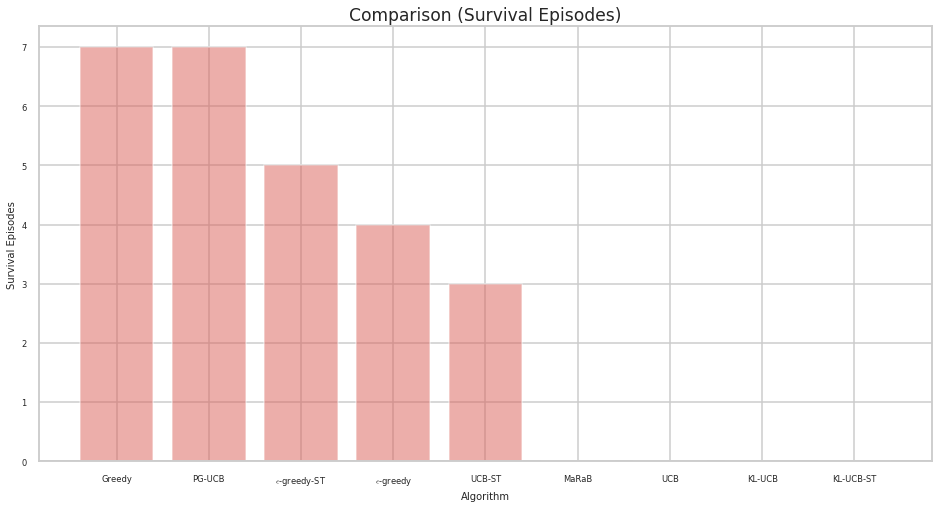

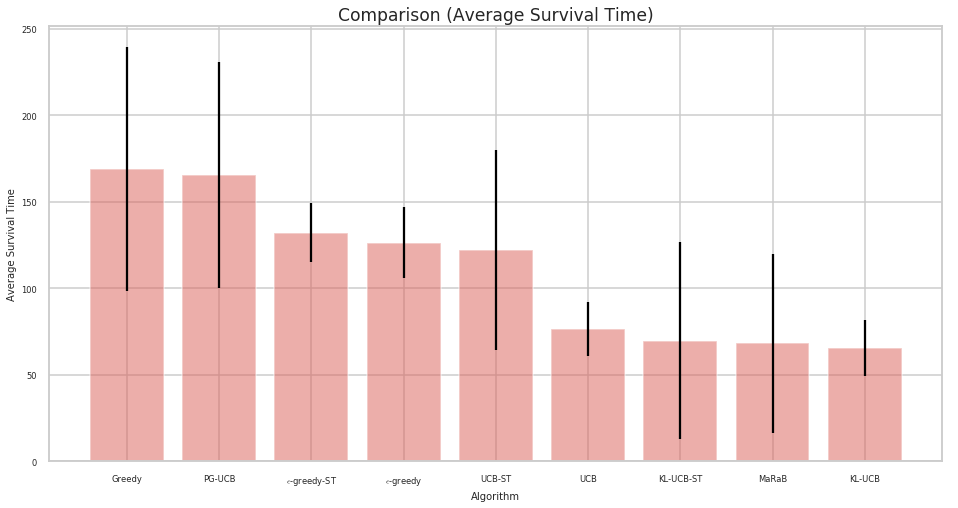

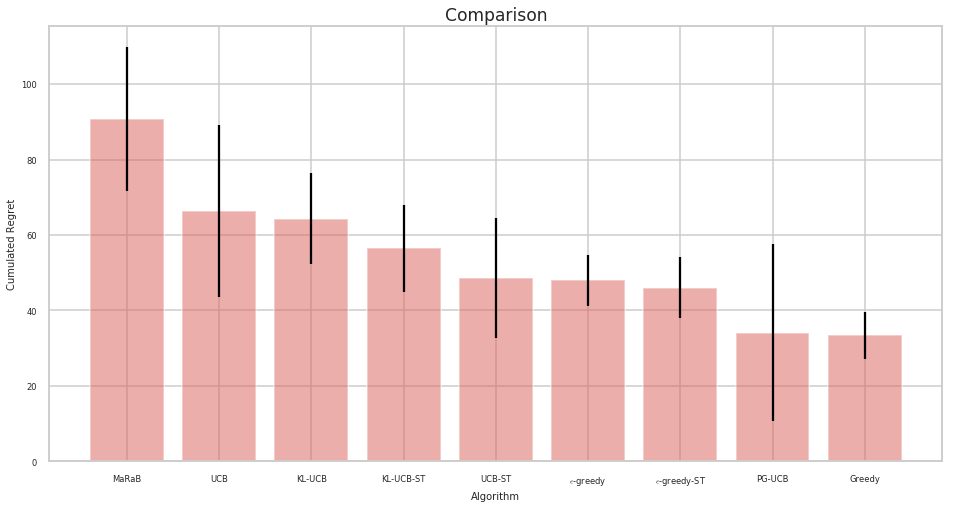

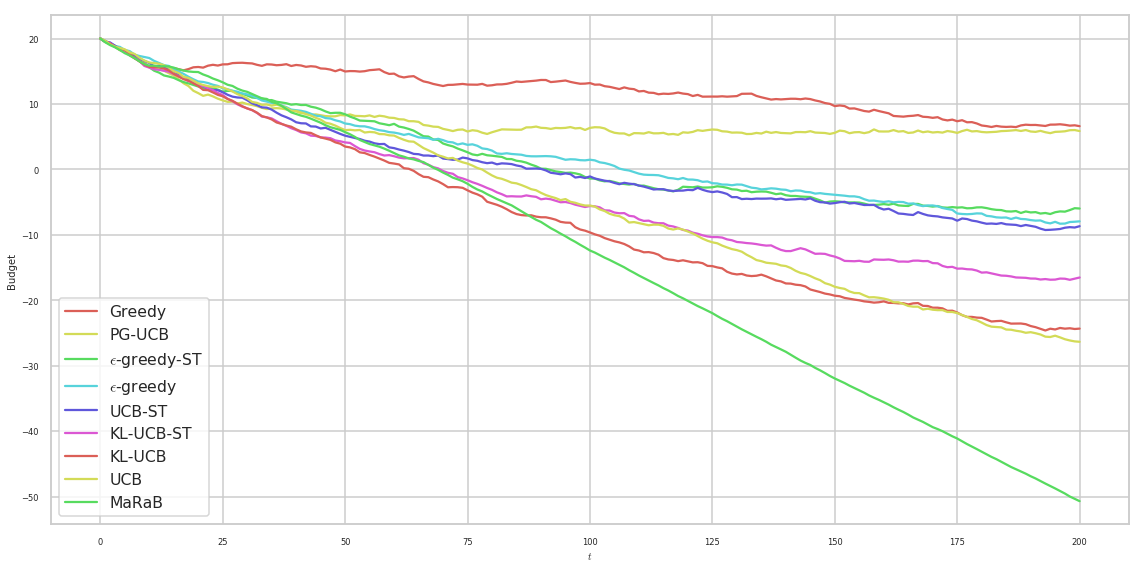

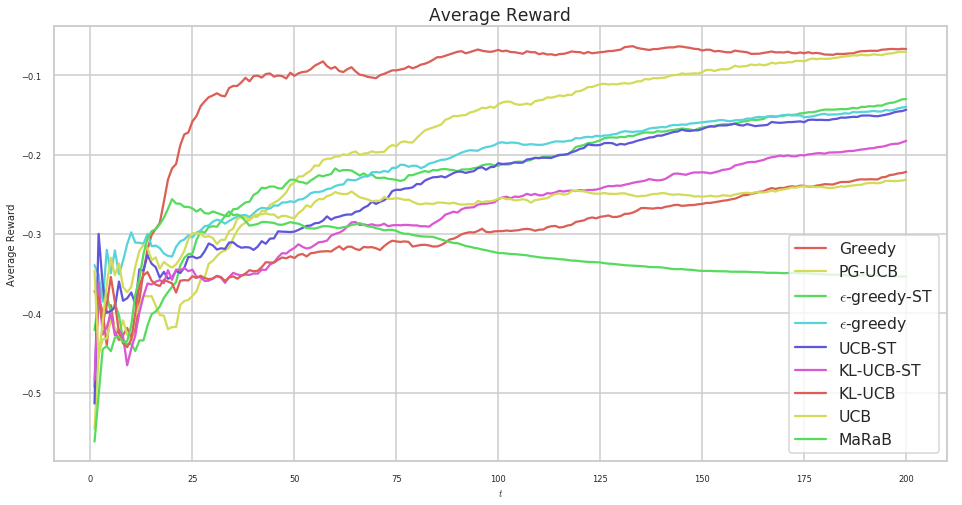

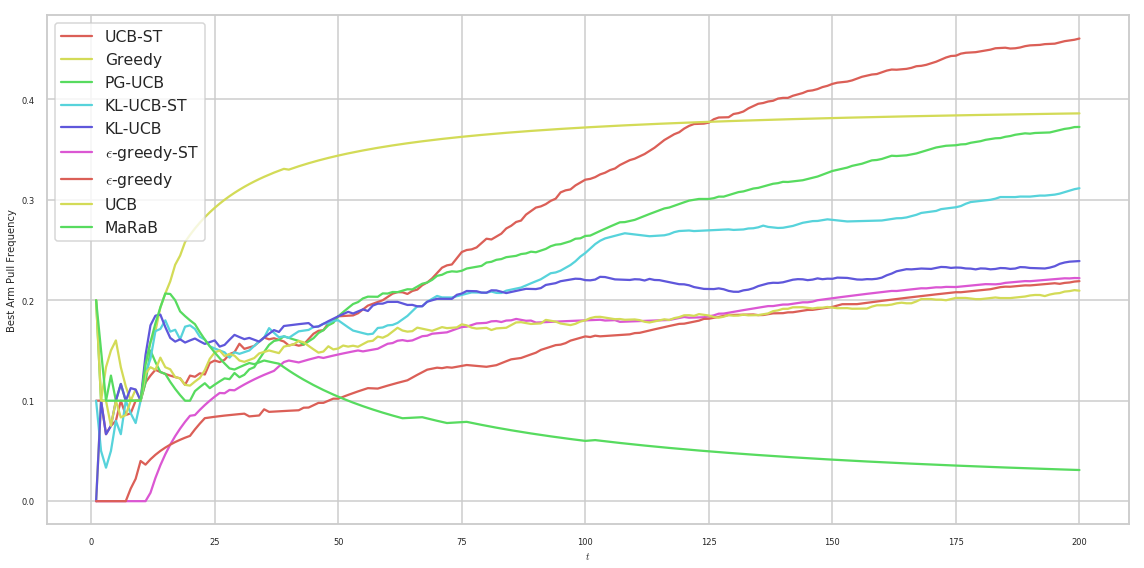

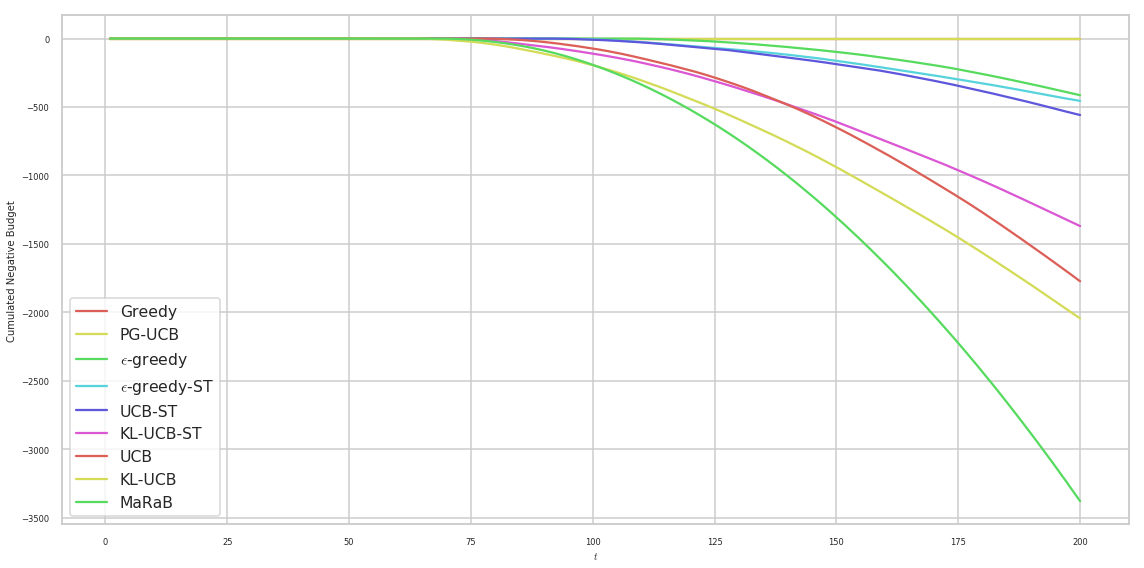

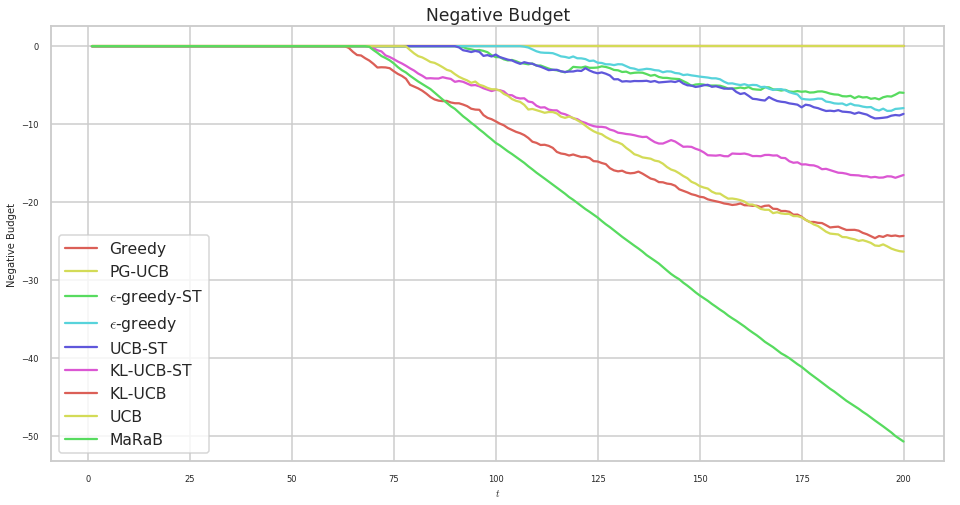

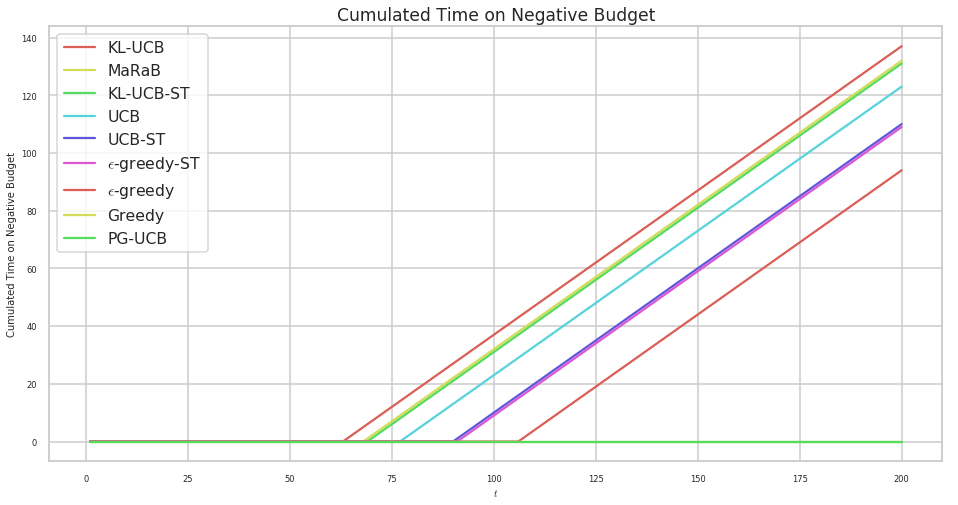

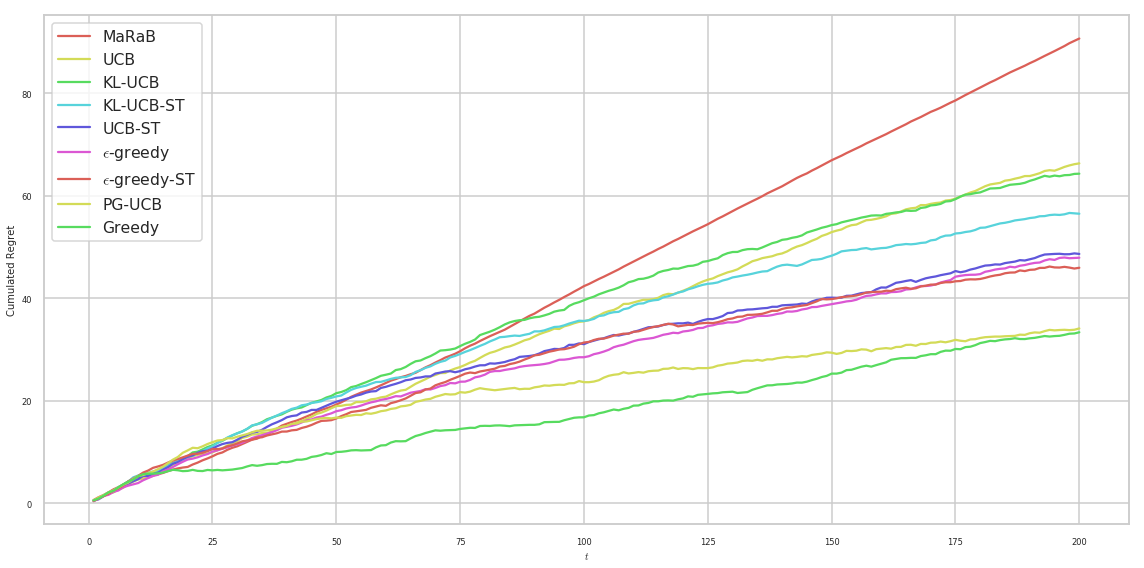

In [26]:
P5 = mabplt(M5)

rate_names = [
    "Survival Episodes Rate", 
    "Survival Time (before ruin or end) (averaged over episodes)", 
    "Survival Time (std dev)", 
    "Cumulative Time on Negative Budget (averaged over episodes)", 
    "Cumulative Time on Negative Budget (std dev)", 
    "Cumulative Negative Budget (averaged over episodes)",
    "Cumulative Negative Budget (std dev)",
    "Cumulative Regret (averaged over episodes)",
    "Cumulative Regret (std dev)"
    ]
#rate_algs = [str(g) for g in M.G]
rate_algs = ["$\epsilon$-greedy-ST", "$\epsilon$-greedy", "KL-UCB-ST", "KL-UCB", "UCB-ST", "UCB", "PG-UCB", "Greedy", "MaRaB"]
rate_values = [M5.renb, M5.MTTNB, M5.DTTNB, M5.mstnb, M5.dstnb, M5.msnb, M5.dsnb, M5.msl, M5.dsl]
df = pd.DataFrame(rate_values, rate_names, columns=rate_algs)
display(df)

P5.plot_comp_algs_ruined_episodes(names=rate_algs, names_rotation='horizontal', compact_view=False)#, filename='images/surv_rate_GL_t100.pdf')
P5.plot_comp_algs_survival_time(names=rate_algs, names_rotation='horizontal', compact_view=False)#, filename='images/surv_time_GL_t100.pdf')
P5.plot_comp_algs_cumulated_regret(names=rate_algs, names_rotation='horizontal', compact_view=False)

P5.plot_budget_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
#plt.savefig('images/budget_GL_t200.pdf', bbox_inches='tight')
plt.show()

P5.plot_average_reward_progression(names=rate_algs)

P5.plot_precision_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
#plt.savefig('images/precision_GL_t200.pdf', bbox_inches='tight')
plt.show()

P5.plot_cumulated_negative_budget_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
#plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

P5.plot_negative_budget_progression(names=rate_algs)

P5.plot_negative_budget_time_progression(names=rate_algs)

P5.plot_cumulated_regret_progression(show=False, title="", names=rate_algs)
plt.tight_layout()
#plt.savefig('images/negative_GL_t200.pdf', bbox_inches='tight')
plt.show()

#for j, g in enumerate(M.G):
#    P.plot_survival_histogram(j=j, title=str(g))

## Simulation 4 : Linear Gaussian - Long-Horizon

 - Few Repetitions 
 - Long Horizon

In [0]:
#time-horizon
tau = 15000 #15000 

#repetitions
n = 1 #100

M6 = mabs(A, G, tau, repetitions=n, window=win, inibudget=b_0)
M6.run(tqdm_leave=True)

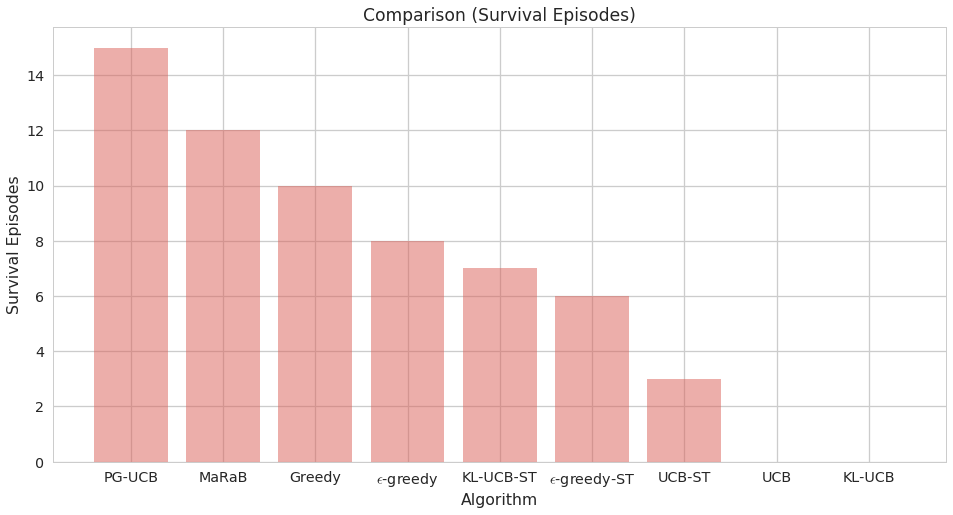

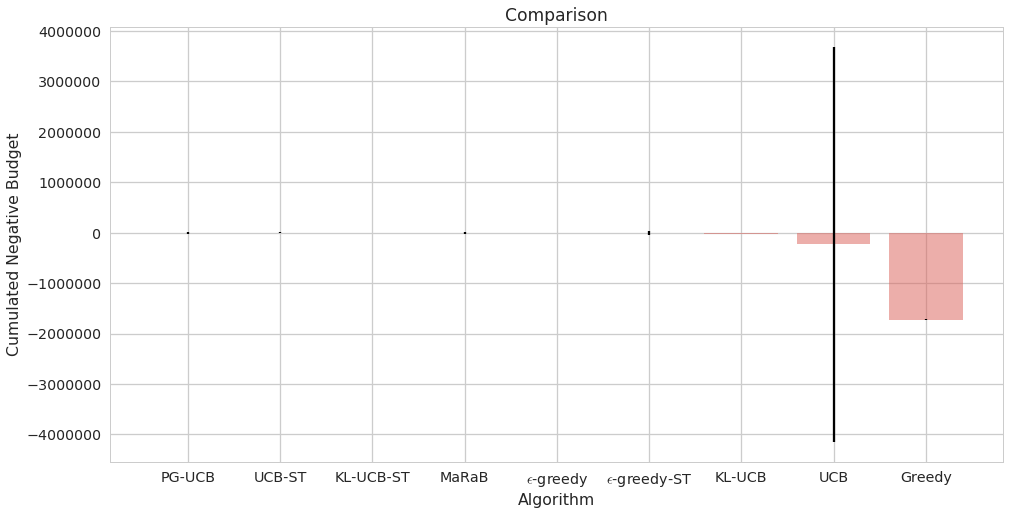

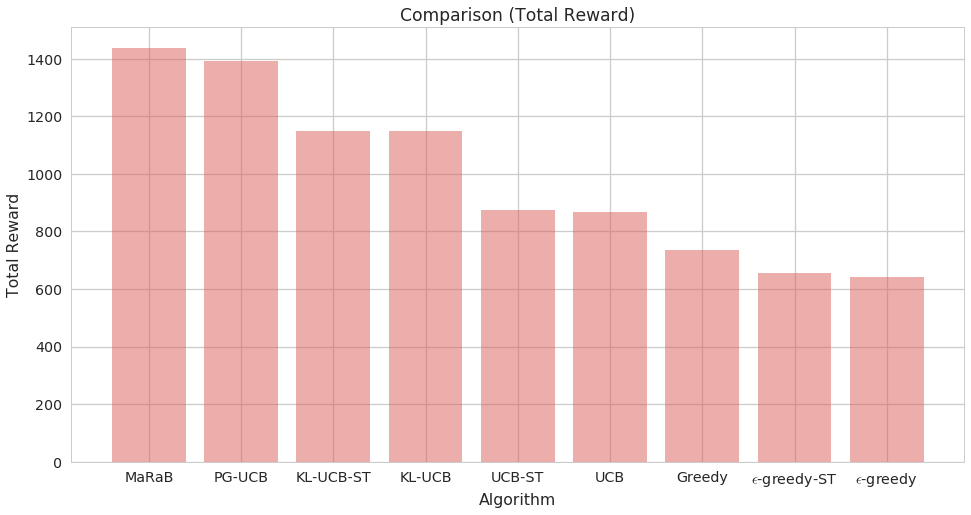

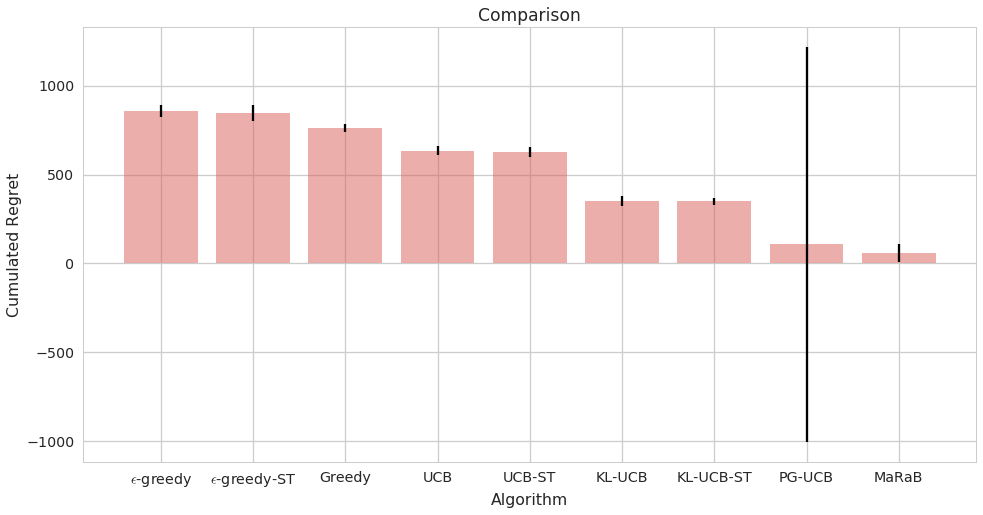

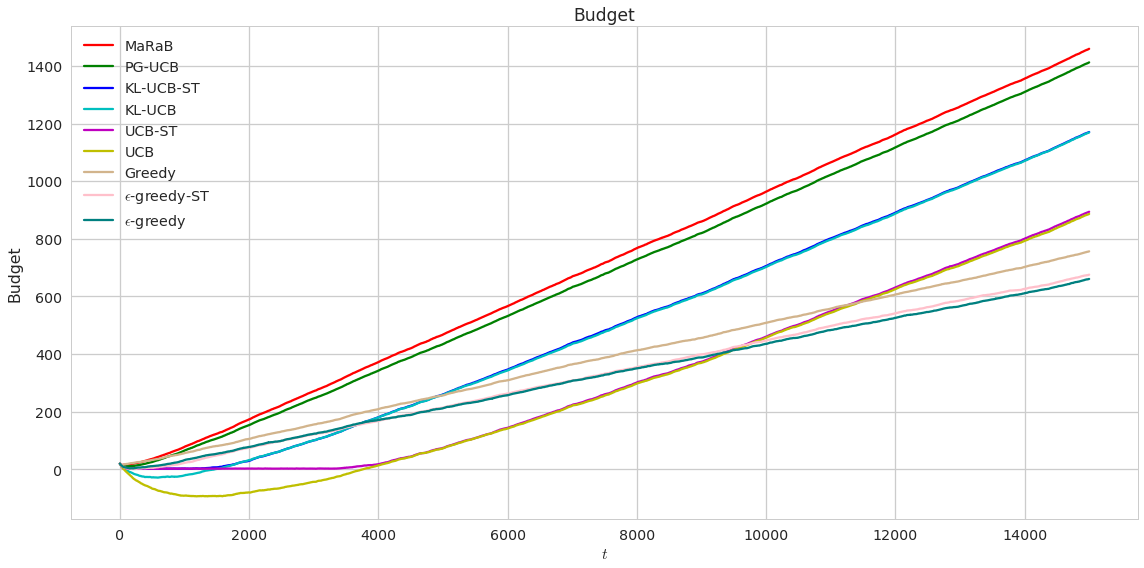

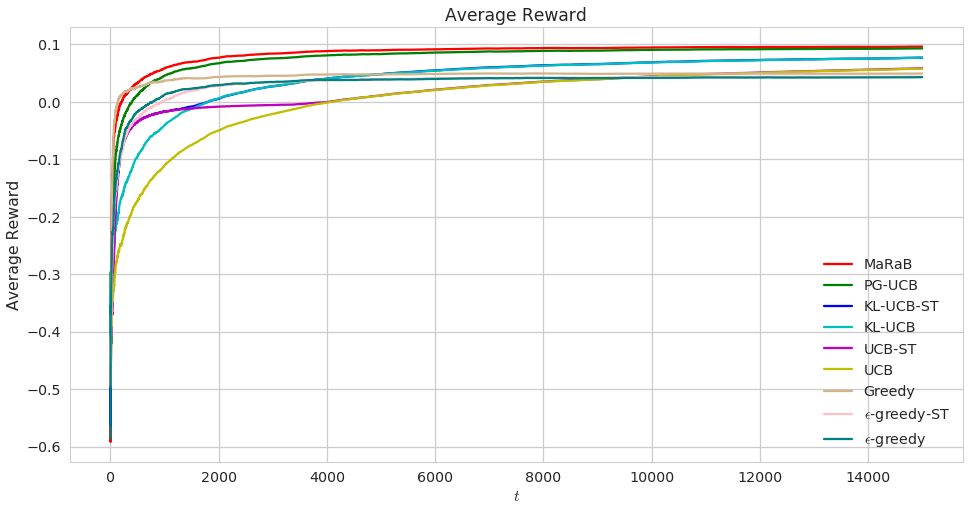

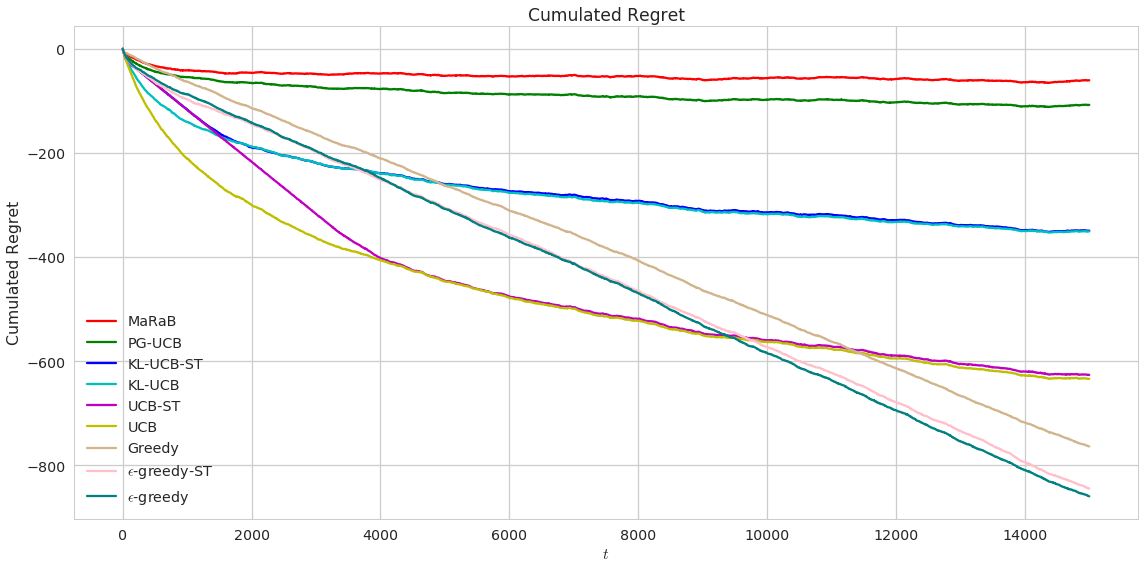

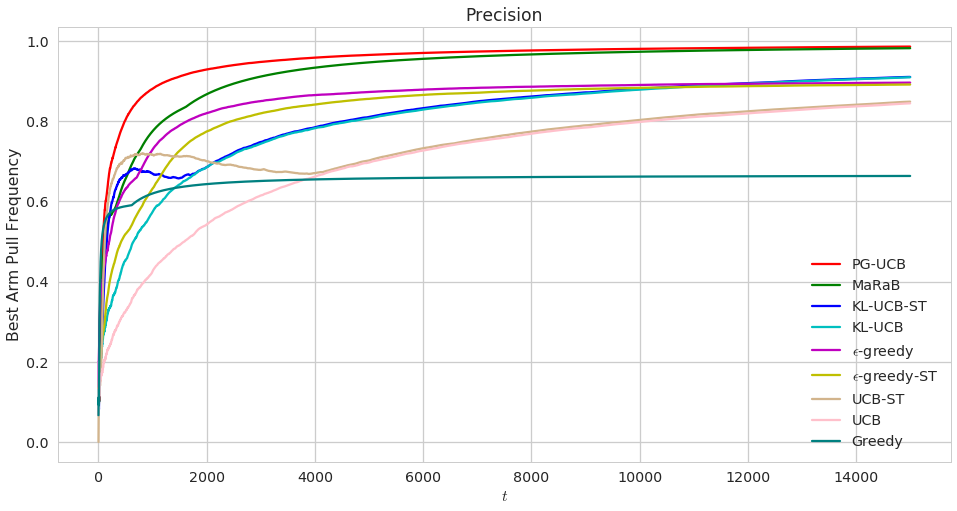

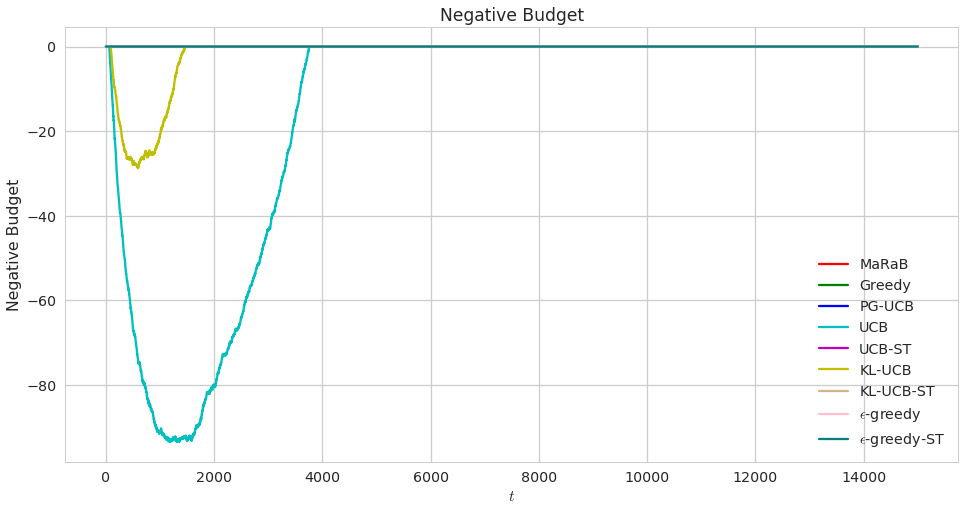

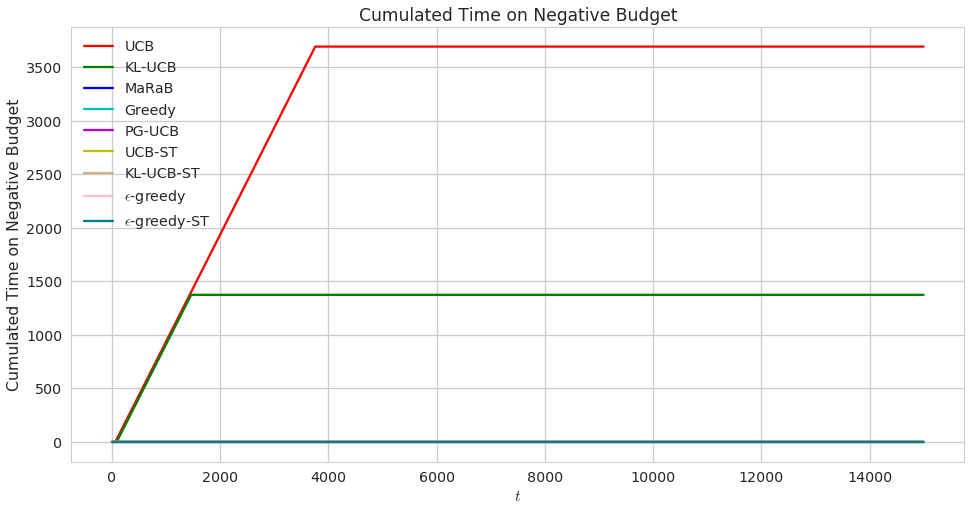

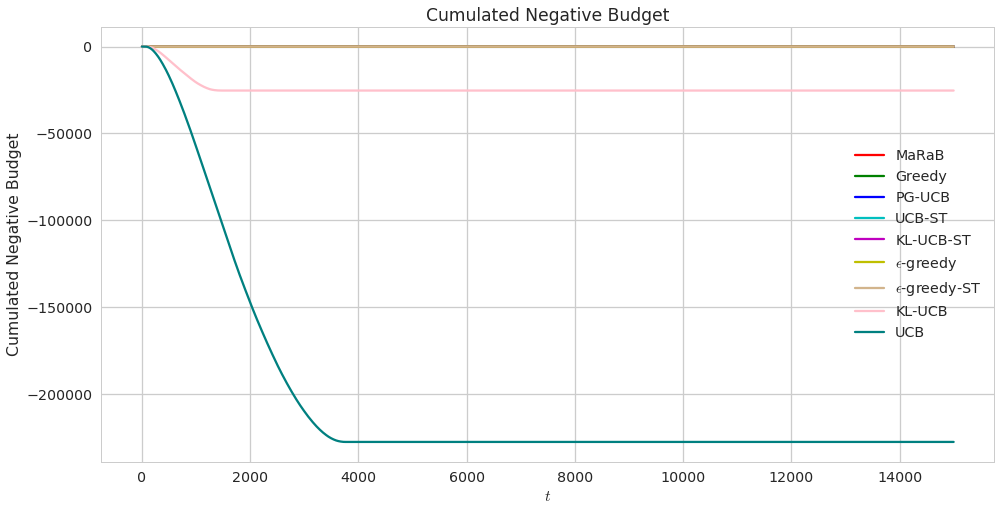

In [0]:
P6 = mabplt(M6)

rate_values = [M6.renb, M6.MTTNB, M6.DTTNB, M6.mstnb, M6.dstnb, M6.msnb, M6.dsnb, M6.msl, M6.dsl]
df = pd.DataFrame(rate_values, rate_names, columns=rate_algs)
display(df)

P6.plot_comp_algs_ruined_episodes(names=rate_algs, names_rotation='horizontal', compact_view=False)
P6.plot_comp_algs_cumulated_negative_budget(names=rate_algs, names_rotation='horizontal', compact_view=False)
P6.plot_comp_algs_total_rewards(names=rate_algs, names_rotation='horizontal', compact_view=False)
P6.plot_comp_algs_cumulated_regret(names=rate_algs, names_rotation='horizontal', compact_view=False)

P6.plot_budget_progression(show=False, names=rate_algs)
plt.tight_layout()
#plt.savefig('images/budget_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P6.plot_average_reward_progression(names=rate_algs)

P6.plot_cumulated_regret_progression(show=False, names=rate_algs)
plt.tight_layout()
#plt.savefig('images/regret_GL_t15000.pdf', bbox_inches='tight')
plt.show()

P6.plot_precision_progression(names=rate_algs)

P6.plot_negative_budget_progression(names=rate_algs)
P6.plot_negative_budget_time_progression(names=rate_algs)
P6.plot_cumulated_negative_budget_progression(names=rate_algs)

## Load and Save

In [0]:
# Load the simulation back from the pickle file.
with open('mab.pickle', 'rb') as f:
M = pickle.load(f)

In [0]:
# Save the simulation into a pickle file.
with open('mab.pickle', 'wb') as f:
    pickle.dump(M, f, pickle.HIGHEST_PROTOCOL)